# **Predicting Credit Card Customer Churn: A Clustering and Classification Approach**
---

# Content
- About Project
- Getting Started
- Exploratory Data Analysis (EDA)
- Unsupervised Learning (Clustering Analysis)
- Supervised Learning (Churn Classification)



---



# About Project

This project is considered a machine learning project that focuses mainly on chrun analysis (using clustering and classifcation). The dataset is downloaded from kaggle website (https://www.kaggle.com/datasets/thedevastator/predicting-credit-card-customer-attrition-with-m), and it's used under (CC0: Public Domain) license. The data comes with a nieve bayes model that predict the Attrition Flag Column.
But I will not use it, and try to perform a new model to best classify this target label.

<br>

The project is mainly divided into two parts: <br>

1. Unsupervised Learning (Clustering Analysis) <br>
In this other part of the project, I'm applying clustering analysis to some features in the dataset to help exploring patterns about churn and non-churn. This is supposed to help finance stakeholders to understand what patterns may lead a customer to churn, so they can try working on some solutions or even further data collection that concentrate more on other features.

2. Supervised Learning (Churn Classification) <br>
In this part of the project, I'm using some classification algorithms (such as decision trees) to be able to predict weather a customer will probably churn or not, based on database of customers with target label (Existing Customer / Attrited Customer)

✨✨✨✨✨✨✨✨✨✨✨✨✨✨✨✨✨✨✨✨✨✨✨✨✨✨✨✨✨✨✨✨✨✨✨✨✨✨✨✨✨✨✨✨✨✨

# Getting Started

In [ ]:
# importing libraries and modules

import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import gridspec
from mpl_toolkits.mplot3d import Axes3D

import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

from ipywidgets import interact, IntSlider

import random
import pickle
import warnings

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.cluster import KMeans, DBSCAN

from sklearn.metrics import confusion_matrix, silhouette_score


In [ ]:
# setting plotting characteristics
pd.set_option('display.max_columns', None)
plt.rcParams['figure.figsize'] = (10,3)
plt.style.use('ggplot')
color_palettes = sns.color_palette()
%matplotlib inline


In [ ]:
# reading data from csv file
df = pd.read_csv('/content/credit_card_customers.csv')


✨✨✨✨✨✨✨✨✨✨✨✨✨✨✨✨✨✨✨✨✨✨✨✨✨✨✨✨✨✨✨✨✨✨✨✨✨✨✨✨✨✨✨✨✨✨

# Exploratory Data Analysis (EDA)

In [ ]:
# data preview
df.head()


CLIENTNUM     Attrition_Flag  Customer_Age Gender  Dependent_count  \
0  768805383  Existing Customer            45      M                3   
1  818770008  Existing Customer            49      F                5   
2  713982108  Existing Customer            51      M                3   
3  769911858  Existing Customer            40      F                4   
4  709106358  Existing Customer            40      M                3   

  Education_Level Marital_Status Income_Category Card_Category  \
0     High School        Married     $60K - $80K          Blue   
1        Graduate         Single  Less than $40K          Blue   
2        Graduate        Married    $80K - $120K          Blue   
3     High School        Unknown  Less than $40K          Blue   
4      Uneducated        Married     $60K - $80K          Blue   

   Months_on_book  Total_Relationship_Count  Months_Inactive_12_mon  \
0              39                         5                       1   
1              44                         6                       1   
2              36                         4                       1   
3              34                         3                       4   
4              21                         5                       1   

   Contacts_Count_12_mon  Credit_Limit  Total_Revolving_Bal  Avg_Open_To_Buy  \
0                      3       12691.0                  777          11914.0   
1                      2        8256.0                  864           7392.0   
2                      0        3418.0                    0           3418.0   
3                      1        3313.0                 2517            796.0   
4                      0        4716.0                    0           4716.0   

   Total_Amt_Chng_Q4_Q1  Total_Trans_Amt  Total_Trans_Ct  Total_Ct_Chng_Q4_Q1  \
0                 1.335             1144              42                1.625   
1                 1.541             1291              33                3.714   
2                 2.594             1887              20                2.333   
3                 1.405             1171              20                2.333   
4                 2.175              816              28                2.500   

   Avg_Utilization_Ratio  \
0                  0.061   
1                  0.105   
2                  0.000   
3                  0.760   
4                  0.000   

   Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1  \
0                                           0.000093                                                                                    
1                                           0.000057                                                                                    
2                                           0.000021                                                                                    
3                                           0.000134                                                                                    
4                                           0.000022                                                                                    

   Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2  
0                                            0.99991                                                                                   
1                                            0.99994                                                                                   
2                                            0.99998                                                                                   
3                                            0.99987                                                                                   
4                                            0.99998

In [ ]:
# dataframe size
df.shape


(10127, 23)

In [ ]:
# displaying columns
df.columns


Index(['CLIENTNUM', 'Attrition_Flag', 'Customer_Age', 'Gender',
       'Dependent_count', 'Education_Level', 'Marital_Status',
       'Income_Category', 'Card_Category', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio',
       'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1',
       'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'],
      dtype='object')

In [ ]:
# rename some columns to have a unified convention
df = df.rename(
    columns = {
        'CLIENTNUM': 'Client_Num',
        'Dependent_count': 'Dependent_Ct',
        'Months_on_book': 'Months_On_Book',
        'Total_Relationship_Count': 'Total_Relationship_Ct',
        'Months_Inactive_12_mon': 'Months_Inactive_12_Mon',
        'Contacts_Count_12_mon': 'Contacts_Ct_12_Mon',
        }
    )


In [ ]:
# remove not needed columns
df = df[[
  'Client_Num', 'Attrition_Flag', 'Customer_Age', 'Gender', 'Dependent_Ct', 'Education_Level',
  'Marital_Status', 'Income_Category', 'Card_Category', 'Months_On_Book', 'Total_Relationship_Ct',
  'Months_Inactive_12_Mon', 'Contacts_Ct_12_Mon', 'Credit_Limit', 'Total_Revolving_Bal', 'Avg_Open_To_Buy',
  'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt', 'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio'
  # 'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1',
  # 'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'
]]


In [ ]:
# displaying columns
df.columns


Index(['Client_Num', 'Attrition_Flag', 'Customer_Age', 'Gender',
       'Dependent_Ct', 'Education_Level', 'Marital_Status', 'Income_Category',
       'Card_Category', 'Months_On_Book', 'Total_Relationship_Ct',
       'Months_Inactive_12_Mon', 'Contacts_Ct_12_Mon', 'Credit_Limit',
       'Total_Revolving_Bal', 'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1',
       'Total_Trans_Amt', 'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1',
       'Avg_Utilization_Ratio'],
      dtype='object')

## Detailed Explanation of Some Columns


---



### Months_On_Book

- "Months On Book" is a metric that indicates the period that a customer has been with the credit company.

- Customer Loyalty: A higher value indicates that the customer has been with the credit card company for a long period, potentially signaling loyalty.

- Account Maturity: It can be used to assess how mature or seasoned an account is. Newer accounts (lower "Months On Book") may behave differently compared to older ones.

- Risk Analysis: From a risk analysis perspective, longer-standing customers might have more credit history, making it easier to predict their creditworthiness.

- Engagement Opportunities: Credit card companies can use this metric to offer retention deals or new products to customers based on their tenure.



---



### Total_Relationship_Ct


- "Total Relationship Count" is a metric that indicates the number of products/services a customer is using from a specific provider.

- Examples of what might be included in "Total Relationship Count": Credit cards, Savings accounts, Loans, Insurance, financial products.

- By analyzing "Total Relationship Count" Column, companies can gain insights into the value of their customers and identify opportunities for cross-selling or upselling additional products and services. Customers with a higher "Total Relationship Count" are generally considered more valuable and less likely to churn.

---



### Total_Revolving_Bal


- "Total Revovling Balance" is a numerical variable that refers to the total amount of money that the customer owes on their credit cards.

- By analyzing the "Total Revovling Balance", companies can gain insights into customer spending habits, credit utilization, and the risk of default. Customers with high "Total Revovling Balance" may be more likely to experience financial difficulties or default on their debt.



---



### Avg_Open_To_Buy

- "Average Open To Buy" is a numerical variable that represents the average amount of credit available to a customer on their credit card accounts. It is calculated by subtracting the customer's "current Revolving Balance" from their "Credit Limit".

- By analyzing "Average Open To Buy", companies can gain insights into customer spending habits and credit utilization. A high "Average Open To Buy" may indicate that the customer has a low "credit utilization ratio", which can be a positive factor in credit scoring. On the other hand, a low "Average Open To Buy" may suggest that the customer is nearing their "Credit Limit", which could be a sign of financial strain.



---



### Total_Amt_Chng_Q4_Q1


- "Total Amount Change (Q4:Q1)" is a numerical variable that indicates the change in the total amount spent or charged by a customer from the fourth quarter of the previous year to the first quarter of the current year.

- Here's a breakdown of what this metric indicates:
 - Q4: The fourth quarter of the previous year.
 - Q1: The first quarter of the current year.
 - "Total Amount Change (Q4:Q1)": The difference between the total amount spent or charged in Q4 and Q1.

- This metric can provide insights into customer spending patterns and seasonal trends. For example, a positive value for "Total Amount Change (Q4:Q1)" indicates that the customer spent more in Q1 compared to Q4, while a negative value suggests a decrease in spending.



---



### Total_Ct_Chng_Q4_Q1

- "Total Count Change (Q4:Q1)" is a numerical variable that indicates the change in the total number of transactions made by a customer from the fourth quarter of the previous year to the first quarter of the current year.

- This metric can provide insights into customer spending patterns and transaction frequency. For example, a positive value "Total Count Change (Q4:Q1)" indicates that the customer made more transactions in Q1 compared to Q4, while a negative value suggests a decrease in transaction activity.




---



### Avg_Utilization_Ratio


- "Average Utilization Ratio" is the percentage of a customer's available credit that is currently being used. It is calculated by dividing the customer's current balance by their credit limit.

- By analyzing the "Average Utilization Ratio", companies can gain insights into customer spending habits and credit risk. A high "Utilization Ratio" may indicate that the customer is nearing their credit limit, which could be a sign of financial strain or a higher risk of default. On the other hand, a low "Utilization Ratio" may suggest that the customer is not using their available credit to its full potential.



---



In [ ]:
# columns data types
print(df.dtypes)


Client_Num                  int64
Attrition_Flag             object
Customer_Age                int64
Gender                     object
Dependent_Ct                int64
Education_Level            object
Marital_Status             object
Income_Category            object
Card_Category              object
Months_On_Book              int64
Total_Relationship_Ct       int64
Months_Inactive_12_Mon      int64
Contacts_Ct_12_Mon          int64
Credit_Limit              float64
Total_Revolving_Bal         int64
Avg_Open_To_Buy           float64
Total_Amt_Chng_Q4_Q1      float64
Total_Trans_Amt             int64
Total_Trans_Ct              int64
Total_Ct_Chng_Q4_Q1       float64
Avg_Utilization_Ratio     float64
dtype: object


In [ ]:
# numerical columns summary statistics
df.describe()


Client_Num  Customer_Age  Dependent_Ct  Months_On_Book  \
count  1.012700e+04  10127.000000  10127.000000    10127.000000   
mean   7.391776e+08     46.325960      2.346203       35.928409   
std    3.690378e+07      8.016814      1.298908        7.986416   
min    7.080821e+08     26.000000      0.000000       13.000000   
25%    7.130368e+08     41.000000      1.000000       31.000000   
50%    7.179264e+08     46.000000      2.000000       36.000000   
75%    7.731435e+08     52.000000      3.000000       40.000000   
max    8.283431e+08     73.000000      5.000000       56.000000   

       Total_Relationship_Ct  Months_Inactive_12_Mon  Contacts_Ct_12_Mon  \
count           10127.000000            10127.000000        10127.000000   
mean                3.812580                2.341167            2.455317   
std                 1.554408                1.010622            1.106225   
min                 1.000000                0.000000            0.000000   
25%                 3.000000                2.000000            2.000000   
50%                 4.000000                2.000000            2.000000   
75%                 5.000000                3.000000            3.000000   
max                 6.000000                6.000000            6.000000   

       Credit_Limit  Total_Revolving_Bal  Avg_Open_To_Buy  \
count  10127.000000         10127.000000     10127.000000   
mean    8631.953698          1162.814061      7469.139637   
std     9088.776650           814.987335      9090.685324   
min     1438.300000             0.000000         3.000000   
25%     2555.000000           359.000000      1324.500000   
50%     4549.000000          1276.000000      3474.000000   
75%    11067.500000          1784.000000      9859.000000   
max    34516.000000          2517.000000     34516.000000   

       Total_Amt_Chng_Q4_Q1  Total_Trans_Amt  Total_Trans_Ct  \
count          10127.000000     10127.000000    10127.000000   
mean               0.759941      4404.086304       64.858695   
std                0.219207      3397.129254       23.472570   
min                0.000000       510.000000       10.000000   
25%                0.631000      2155.500000       45.000000   
50%                0.736000      3899.000000       67.000000   
75%                0.859000      4741.000000       81.000000   
max                3.397000     18484.000000      139.000000   

       Total_Ct_Chng_Q4_Q1  Avg_Utilization_Ratio  
count         10127.000000           10127.000000  
mean              0.712222               0.274894  
std               0.238086               0.275691  
min               0.000000               0.000000  
25%               0.582000               0.023000  
50%               0.702000               0.176000  
75%               0.818000               0.503000  
max               3.714000               0.999000

In [ ]:
# null values
print(df.isnull().sum())   # no nulls


Client_Num                0
Attrition_Flag            0
Customer_Age              0
Gender                    0
Dependent_Ct              0
Education_Level           0
Marital_Status            0
Income_Category           0
Card_Category             0
Months_On_Book            0
Total_Relationship_Ct     0
Months_Inactive_12_Mon    0
Contacts_Ct_12_Mon        0
Credit_Limit              0
Total_Revolving_Bal       0
Avg_Open_To_Buy           0
Total_Amt_Chng_Q4_Q1      0
Total_Trans_Amt           0
Total_Trans_Ct            0
Total_Ct_Chng_Q4_Q1       0
Avg_Utilization_Ratio     0
dtype: int64


## Columns

In [ ]:
df.head(1)

Client_Num     Attrition_Flag  Customer_Age Gender  Dependent_Ct  \
0   768805383  Existing Customer            45      M             3   

  Education_Level Marital_Status Income_Category Card_Category  \
0     High School        Married     $60K - $80K          Blue   

   Months_On_Book  Total_Relationship_Ct  Months_Inactive_12_Mon  \
0              39                      5                       1   

   Contacts_Ct_12_Mon  Credit_Limit  Total_Revolving_Bal  Avg_Open_To_Buy  \
0                   3       12691.0                  777          11914.0   

   Total_Amt_Chng_Q4_Q1  Total_Trans_Amt  Total_Trans_Ct  Total_Ct_Chng_Q4_Q1  \
0                 1.335             1144              42                1.625   

   Avg_Utilization_Ratio  
0                  0.061

In [ ]:
df.columns


Index(['Client_Num', 'Attrition_Flag', 'Customer_Age', 'Gender',
       'Dependent_Ct', 'Education_Level', 'Marital_Status', 'Income_Category',
       'Card_Category', 'Months_On_Book', 'Total_Relationship_Ct',
       'Months_Inactive_12_Mon', 'Contacts_Ct_12_Mon', 'Credit_Limit',
       'Total_Revolving_Bal', 'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1',
       'Total_Trans_Amt', 'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1',
       'Avg_Utilization_Ratio'],
      dtype='object')

### Client_Num Column

In [ ]:
# data type
df.Client_Num.dtype


dtype('int64')

In [ ]:
# check for duplicates
len(df.Client_Num.unique()), df.shape    # unique identifier


(10127, (10127, 21))



---



### Attrition_Flag Column

In [ ]:
print(df.Attrition_Flag.value_counts())


Attrition_Flag
Existing Customer    8500
Attrited Customer    1627
Name: count, dtype: int64




---



### Customer_Age Column

In [ ]:
print(df.Customer_Age.describe())


count    10127.000000
mean        46.325960
std          8.016814
min         26.000000
25%         41.000000
50%         46.000000
75%         52.000000
max         73.000000
Name: Customer_Age, dtype: float64




---



### Gender Column

In [ ]:
print(df.Gender.value_counts())


Gender
F    5358
M    4769
Name: count, dtype: int64




---



### Dependent_Ct Column

In [ ]:
print(df.Dependent_Ct.value_counts().sort_index())


Dependent_Ct
0     904
1    1838
2    2655
3    2732
4    1574
5     424
Name: count, dtype: int64




---



### Education_Level Column

In [ ]:
print(df.Education_Level.value_counts())


Education_Level
Graduate         3128
High School      2013
Unknown          1519
Uneducated       1487
College          1013
Post-Graduate     516
Doctorate         451
Name: count, dtype: int64




---



### Marital_Status Column

In [ ]:
print(df.Marital_Status.value_counts())


Marital_Status
Married     4687
Single      3943
Unknown      749
Divorced     748
Name: count, dtype: int64




---



### Income_Category Column

In [ ]:
# show unique values of Income_Category column
df.Income_Category.unique()


array(['$60K - $80K', 'Less than $40K', '$80K - $120K', '$40K - $60K',
       '$120K +', 'Unknown'], dtype=object)

In [ ]:
# show value counts of Income_Category column in order
income_category_counts = df.Income_Category.value_counts(sort = False)
custom_order = ['Less than $40K', '$40K - $60K', '$60K - $80K', '$80K - $120K', '$120K +', 'Unknown']
temp_series = pd.Categorical(df['Income_Category'], categories = custom_order, ordered = True)
income_category_counts = pd.DataFrame(temp_series.value_counts())
print(income_category_counts)


                count
Less than $40K   3561
$40K - $60K      1790
$60K - $80K      1402
$80K - $120K     1535
$120K +           727
Unknown          1112




---



### Card_Category Column

In [ ]:
print(df.Card_Category.value_counts())


Card_Category
Blue        9436
Silver       555
Gold         116
Platinum      20
Name: count, dtype: int64




---



### Months_On_Book

In [ ]:
print(df.Months_On_Book.describe())


count    10127.000000
mean        35.928409
std          7.986416
min         13.000000
25%         31.000000
50%         36.000000
75%         40.000000
max         56.000000
Name: Months_On_Book, dtype: float64




---



### Total_Relationship_Count Column
       

In [ ]:
print(df.Total_Relationship_Ct.value_counts().sort_index())


Total_Relationship_Ct
1     910
2    1243
3    2305
4    1912
5    1891
6    1866
Name: count, dtype: int64




---



### Months_Inactive_12_Mon Column

In [ ]:
print(df.Months_Inactive_12_Mon.value_counts().sort_index())


Months_Inactive_12_Mon
0      29
1    2233
2    3282
3    3846
4     435
5     178
6     124
Name: count, dtype: int64




---



### Contacts_Ct_12_Mon Column

In [ ]:
print(df.Contacts_Ct_12_Mon.value_counts().sort_index())


Contacts_Ct_12_Mon
0     399
1    1499
2    3227
3    3380
4    1392
5     176
6      54
Name: count, dtype: int64




---



### Credit_Limit Column

In [ ]:
print(df.Credit_Limit.describe())


count    10127.000000
mean      8631.953698
std       9088.776650
min       1438.300000
25%       2555.000000
50%       4549.000000
75%      11067.500000
max      34516.000000
Name: Credit_Limit, dtype: float64




---



### Total_Revolving_Bal Column


In [ ]:
print(df.Total_Revolving_Bal.describe())


count    10127.000000
mean      1162.814061
std        814.987335
min          0.000000
25%        359.000000
50%       1276.000000
75%       1784.000000
max       2517.000000
Name: Total_Revolving_Bal, dtype: float64




---



### Avg_Open_To_Buy Column


In [ ]:
print(df.Avg_Open_To_Buy.describe())


count    10127.000000
mean      7469.139637
std       9090.685324
min          3.000000
25%       1324.500000
50%       3474.000000
75%       9859.000000
max      34516.000000
Name: Avg_Open_To_Buy, dtype: float64




---



### Total_Amt_Chng_Q4_Q1 Column

In [ ]:
print(df.Total_Amt_Chng_Q4_Q1.describe())


count    10127.000000
mean         0.759941
std          0.219207
min          0.000000
25%          0.631000
50%          0.736000
75%          0.859000
max          3.397000
Name: Total_Amt_Chng_Q4_Q1, dtype: float64




---



### Total_Trans_Amt Column


In [ ]:
print(df.Total_Trans_Amt.describe())


count    10127.000000
mean      4404.086304
std       3397.129254
min        510.000000
25%       2155.500000
50%       3899.000000
75%       4741.000000
max      18484.000000
Name: Total_Trans_Amt, dtype: float64




---



### Total_Trans_Ct Column


In [ ]:
print(df.Total_Trans_Ct.describe())


count    10127.000000
mean        64.858695
std         23.472570
min         10.000000
25%         45.000000
50%         67.000000
75%         81.000000
max        139.000000
Name: Total_Trans_Ct, dtype: float64




---



### Total_Ct_Chng_Q4_Q1 Column

In [ ]:
print(df.Total_Ct_Chng_Q4_Q1.describe())


count    10127.000000
mean         0.712222
std          0.238086
min          0.000000
25%          0.582000
50%          0.702000
75%          0.818000
max          3.714000
Name: Total_Ct_Chng_Q4_Q1, dtype: float64




---



### Avg_Utilization_Ratio Column

In [ ]:
print(df.Avg_Utilization_Ratio.describe())


count    10127.000000
mean         0.274894
std          0.275691
min          0.000000
25%          0.023000
50%          0.176000
75%          0.503000
max          0.999000
Name: Avg_Utilization_Ratio, dtype: float64




---



## Data Distribution of Numerical Columns (Summary Plots)

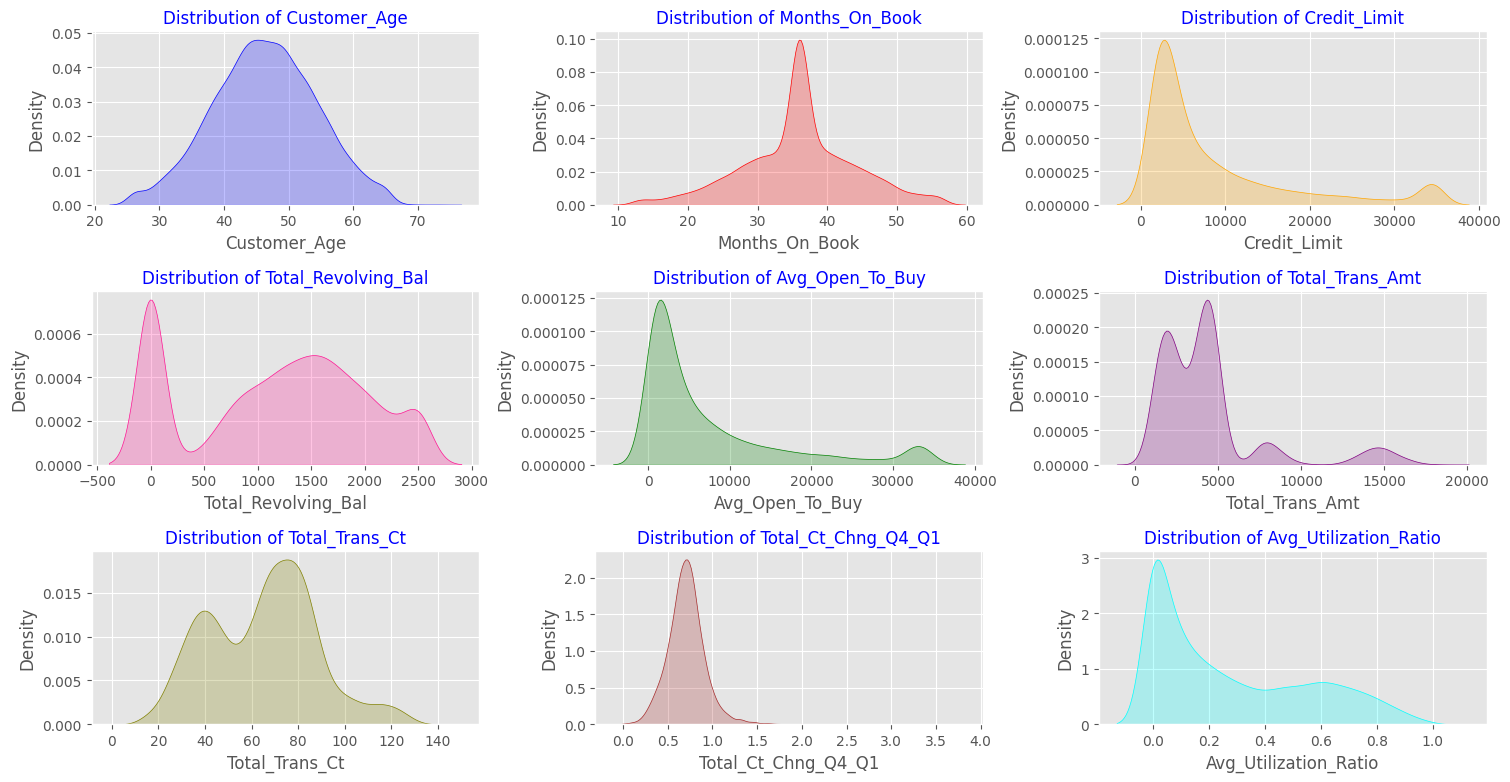

In [ ]:
# data distribution of numerical columns (summary plots)

# list of features and their corresponding colors
features = [
    ('Customer_Age', 'blue'),
    ('Months_On_Book', 'red'),
    ('Credit_Limit', 'orange'),
    ('Total_Revolving_Bal', 'deeppink'),
    ('Avg_Open_To_Buy', 'green'),
    ('Total_Trans_Amt', 'purple'),
    ('Total_Trans_Ct', 'olive'),
    ('Total_Ct_Chng_Q4_Q1', 'brown'),
    ('Avg_Utilization_Ratio', 'cyan')
    ]

# create subplots
fig, axs = plt.subplots(3, 3, figsize=(18, 9))

# loop through each feature and plot
for i, (feature, color) in enumerate(features):
    row, col = divmod(i, 3)
    sns.kdeplot(x = df[feature], ax = axs[row, col], color = color, fill = True)
    axs[row, col].set_title(f'Distribution of {feature}', color = 'blue', fontsize = 12)

# adjust layout
plt.subplots_adjust(wspace = 0.3, hspace = 0.5)
plt.show()




---



## Data Distribution of Categorical Columns (Summary Plots)

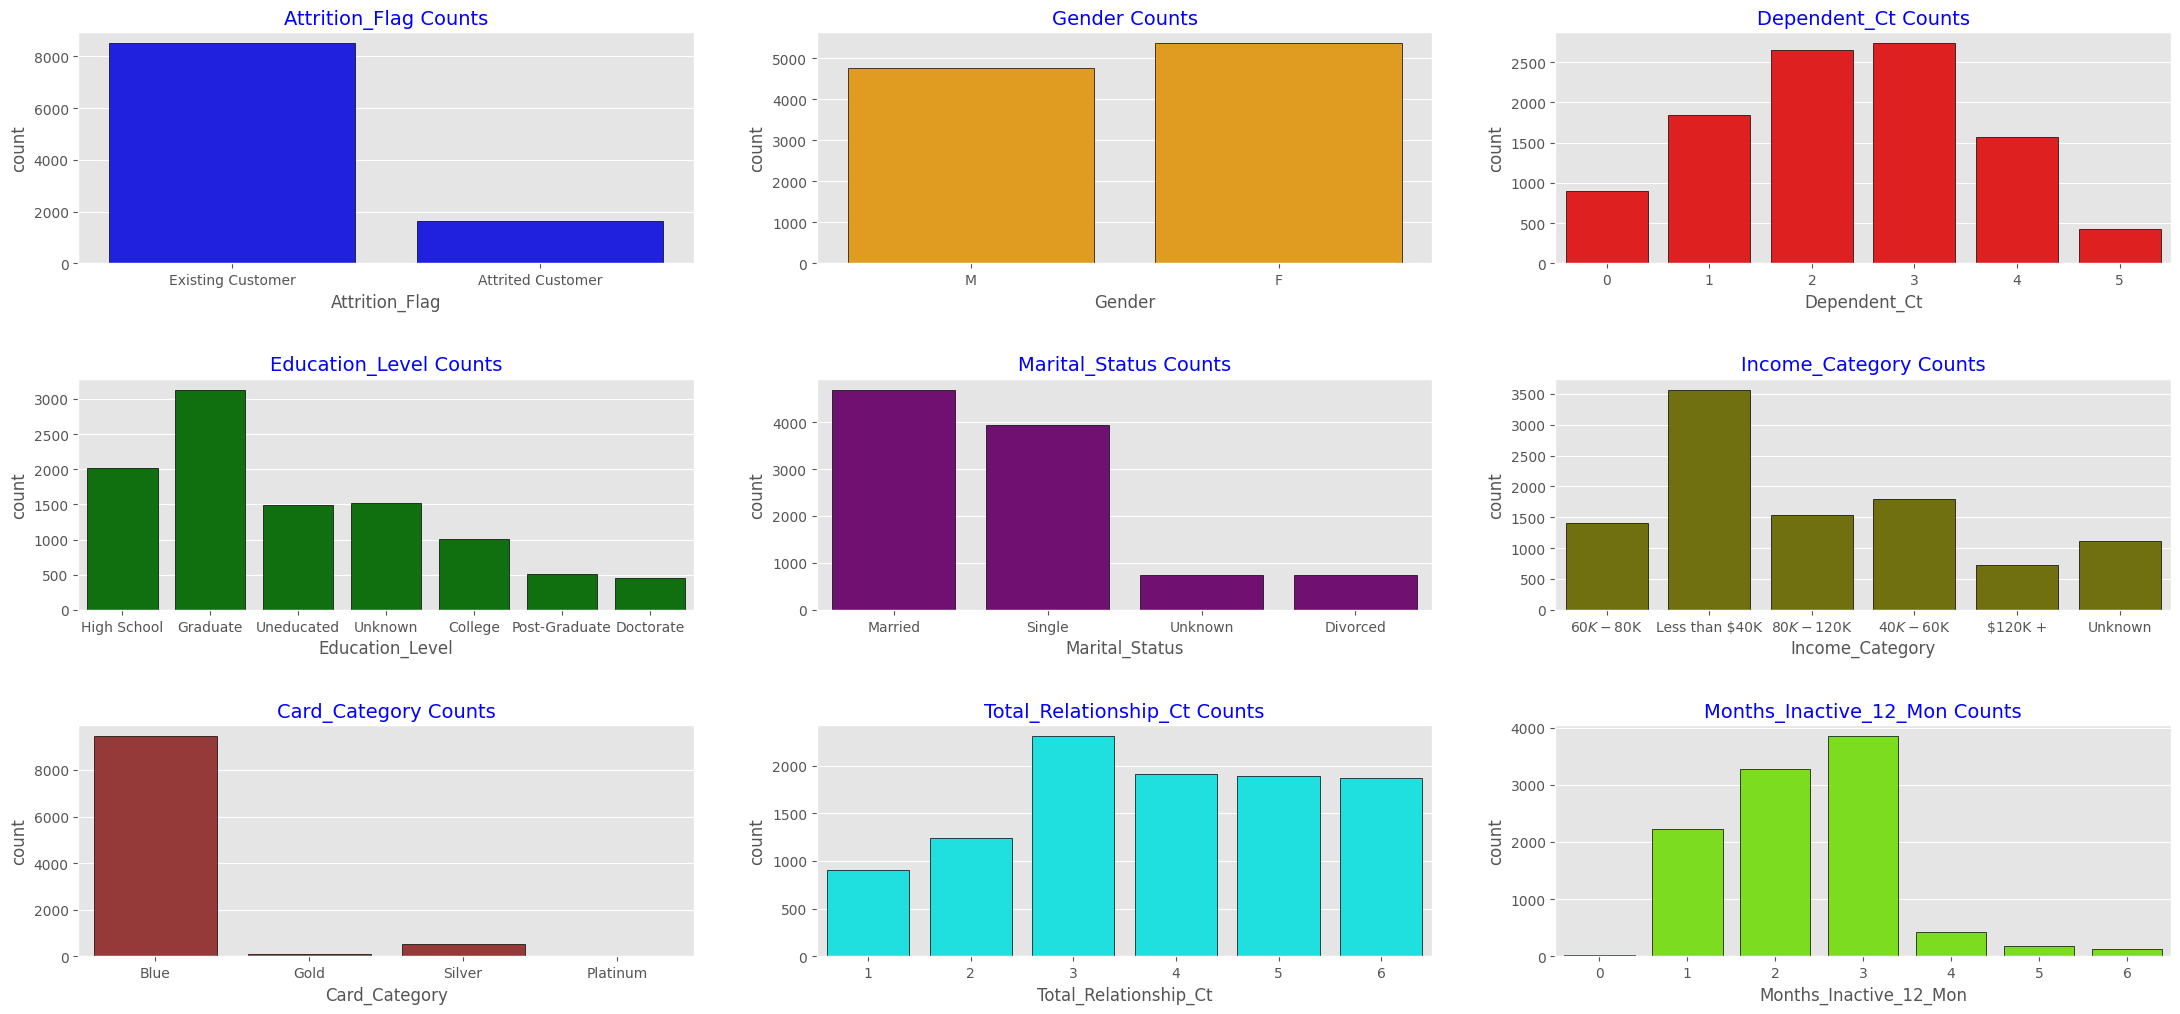

In [ ]:
# data distribution of categroical columns (summary plots)

# list of features and their corresponding colors
features = [
    ('Attrition_Flag', 'blue'),
    ('Gender', 'orange'),
    ('Dependent_Ct', 'red'),
    ('Education_Level', 'green'),
    ('Marital_Status', 'purple'),
    ('Income_Category', 'olive'),
    ('Card_Category', 'brown'),
    ('Total_Relationship_Ct', 'cyan'),
    ('Months_Inactive_12_Mon', 'lawngreen')
    ]

# create subplots
fig, axs = plt.subplots(3, 3, figsize=(27, 12))

# loop through each feature and plot
for i, (feature, color) in enumerate(features):
    row, col = divmod(i, 3)
    sns.countplot(data = df, x = str(feature), ax = axs[row, col], color = color, edgecolor = 'k')
    axs[row, col].set_title(f'{feature} Counts', color = 'blue', fontsize = 14)

# adjust layout
plt.subplots_adjust(wspace = 0.2, hspace = 0.5)
plt.show()




---



## Customers Spending Habits

In [ ]:
df.head(1)


Client_Num     Attrition_Flag  Customer_Age Gender  Dependent_Ct  \
0   768805383  Existing Customer            45      M             3   

  Education_Level Marital_Status Income_Category Card_Category  \
0     High School        Married     $60K - $80K          Blue   

   Months_On_Book  Total_Relationship_Ct  Months_Inactive_12_Mon  \
0              39                      5                       1   

   Contacts_Ct_12_Mon  Credit_Limit  Total_Revolving_Bal  Avg_Open_To_Buy  \
0                   3       12691.0                  777          11914.0   

   Total_Amt_Chng_Q4_Q1  Total_Trans_Amt  Total_Trans_Ct  Total_Ct_Chng_Q4_Q1  \
0                 1.335             1144              42                1.625   

   Avg_Utilization_Ratio  
0                  0.061

### Gender and Age Bias Analysis

#### Gender vs. Card Category

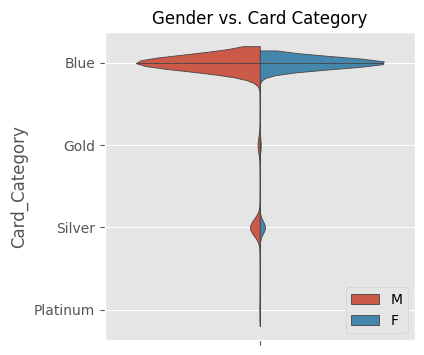

In [ ]:
# visualize relationship between gender and card category
plt.figure(figsize = (4, 4))
sns.violinplot(data = df, y = 'Card_Category', hue = 'Gender', split = True, inner = 'quartiles')
plt.legend(loc = 4)
plt.title('Gender vs. Card Category', fontsize = 12)
plt.show()


**Observations** <br>

- The above violin plot provides a visual representation of the distribution of card categories across genders.

- This violin plot suggests that most clients have blue card category.

- This violin plot suggests that there is no significant difference in the distribution of all card types between genders. Males are more likely to hold each card categroy compared to females.





---



#### Age vs. Card Category

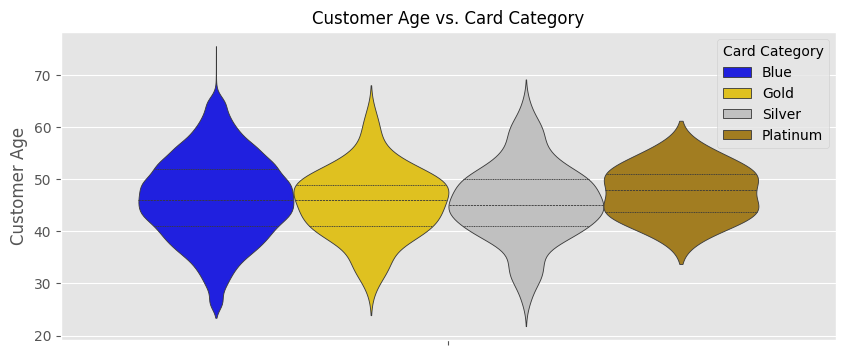

In [ ]:
# define a dictionary mapping card categories to desired colors
card_colors = {
    "Blue": "blue",
    "Gold": "gold",
    "Silver": "silver",
    "Platinum": "darkgoldenrod"
    }

# create violinplot with color palette based on card categories
plt.figure(figsize = (10, 4))
sns.violinplot(data = df, y = 'Customer_Age', hue = 'Card_Category', inner = 'quartiles', palette = card_colors)

# refine plot elements
plt.legend(title = 'Card Category')
plt.title('Customer Age vs. Card Category', fontsize = 12)
plt.ylabel('Customer Age')
plt.show()


**Observations** <br>

This above violin plot shows the age distribution over card categories.

*Age Distribution* <br>
  - The age distribution for each card category is generally skewed to the right, indicating that most customers in each category are older than the median age.
  - The Platinum card category has the highest median age, followed by Gold, Silver, and Blue.
  - The Blue card category has the widest age distribution, suggesting that it attracts customers from a wider age range.

*Overlapping Distributions* <br>
  - There is some overlap between the age distributions of different card categories, particularly between Gold and Silver, and between Silver and Platinum. This suggests that there is no clear-cut age-based segmentation among these categories.

Overall, the plot suggests that while there are some general trends in terms of age distribution across card categories, there is also a significant amount of overlap, indicating that other factors besides age may be influencing card choice.



---



#### Gender vs. Transaction Amount

In [ ]:
# mean transaction amount made by gender
pd.DataFrame(df.groupby('Gender')['Total_Trans_Amt'].mean().sort_index())


Total_Trans_Amt
Gender                 
F           4324.318216
M           4493.706228

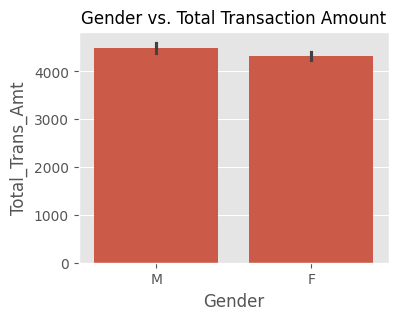

In [ ]:
# visualize mean transactions amount made by each gender
plt.figure(figsize = (4, 3))
sns.barplot(data = df, x = 'Gender', y = 'Total_Trans_Amt', estimator = 'mean')
plt.title('Gender vs. Total Transaction Amount', fontsize = 12)
plt.show()


**Observations** <br>

The plot indicates that there is no significant clear-cut difference in transaction amount based on gender. Other factors, such as age, income, and product preferences, may play a more significant role in determining spending patterns.



---



#### Age vs. Transaction Amount

In [ ]:
# mean transaction amount by age
print(pd.DataFrame(df.groupby('Customer_Age')['Total_Trans_Amt'].mean().sort_index()))


              Total_Trans_Amt
Customer_Age                 
26                2586.641026
27                5315.281250
28                4906.655172
29                5656.142857
30                4875.242857
31                6807.076923
32                5992.669811
33                3660.551181
34                3890.376712
35                3701.211957
36                3691.941176
37                3854.980769
38                4358.501650
39                4273.735736
40                4615.880886
41                4710.343008
42                4716.967136
43                4618.598309
44                4638.342000
45                4629.154321
46                4543.071429
47                4459.613779
48                4581.343220
49                4839.705051
50                4668.730088
51                4802.175879
52                4613.851064
53                4111.465116
54                3805.084691
55                3777.286738
56                4332.503817
57        

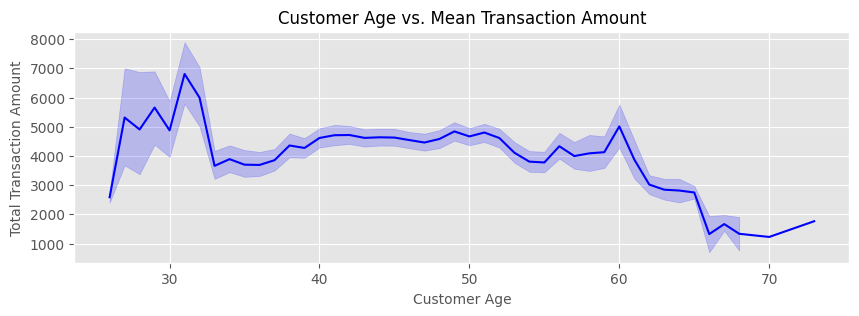

In [ ]:
# visualize mean transaction amount by age
sns.lineplot(data = df, x = 'Customer_Age', y = 'Total_Trans_Amt', estimator = 'mean', color = 'blue')
plt.xlabel('Customer Age', fontsize = 10)
plt.ylabel('Total Transaction Amount', fontsize = 10)
plt.title('Customer Age vs. Mean Transaction Amount', fontsize = 12)
plt.show()


**Observations** <br>

*General Trend* <br>
There appears to be a slight downward trend in total transaction amount as customer age increases. This suggests that older customers may spend less on average than younger customers. So we can focus more the younger customers, also try to search for methods to encourage older customer to spend more.<br>

*Age Groups* <br>
The plot also reveals some variations within specific age groups. For example, there seems to be a peak in spending around the age of 30-35, followed by a gradual decline. <br>

*Individual Variation* <br>
The shaded area around the line plot indicates the variability in transaction amounts within each age group. This suggests that there is a significant amount of individual variation in spending patterns, even within the same age group. <br>

Overall, the plot suggests that while there may be a general trend of decreasing spending with age, there is also a considerable amount of individual variation. Further analysis would be needed to identify the specific factors driving these trends.



---



#### Age vs. Gender vs. Transaction Amount

In [ ]:
# mean transaction amount by age for each gender
pd.DataFrame(df.groupby(['Customer_Age', 'Gender'])['Total_Trans_Amt'].mean().sort_index())


Total_Trans_Amt
Customer_Age Gender                 
26           F           2738.923077
             M           2434.358974
27           F           5068.789474
             M           5675.538462
28           F           4854.461538
...                              ...
67           F           1513.000000
             M           1822.500000
68           M           1335.000000
70           M           1227.000000
73           M           1765.000000

[86 rows x 1 columns]

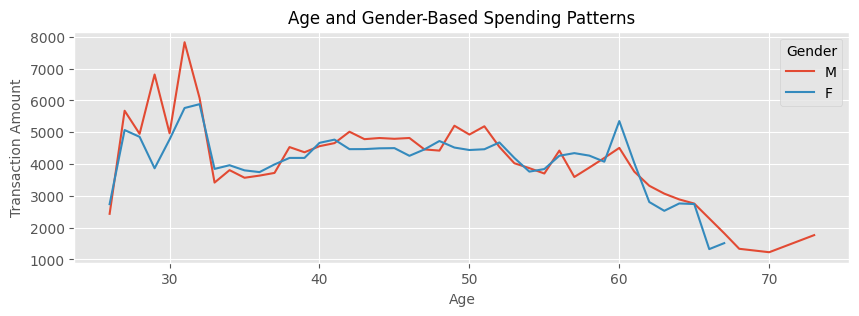

In [ ]:
# visualize the mean transaction amount by age for each gender

warnings.simplefilter(action = 'ignore', category=FutureWarning)

sns.lineplot(
    data = df,
    x = 'Customer_Age',
    y = 'Total_Trans_Amt',
    estimator = 'mean',
    hue = 'Gender',
    errorbar = None
    )
plt.xlabel('Age', fontsize = 10)
plt.ylabel('Transaction Amount', fontsize = 10)
plt.title('Age and Gender-Based Spending Patterns', fontsize = 12)
plt.show()


**Observations** <br>

*Gender-based spending patterns* <br>
The plot reveals distinct spending patterns for males and females across different age groups. <br>

*Peak spending* <br>
Both genders exhibit a peak in transaction amount around the age of 30-35. <br>

*Age-related trends* <br>
While the general trend for both genders is a decline in spending with age, there are some variations within specific age groups. <br>

*Gender differences* <br>
Males tend to have higher transaction amounts in the younger age groups, while females exhibit higher spending in the older age groups. <br>




---



#### Dependent Count vs. Transaction Amount

In [ ]:
# relationship between dependent count and transaction amount
print(pd.DataFrame(df.groupby('Dependent_Ct')['Total_Trans_Amt'].mean().sort_index()))


              Total_Trans_Amt
Dependent_Ct                 
0                 4110.331858
1                 4411.088139
2                 4475.953296
3                 4309.106515
4                 4469.992376
5                 4917.356132


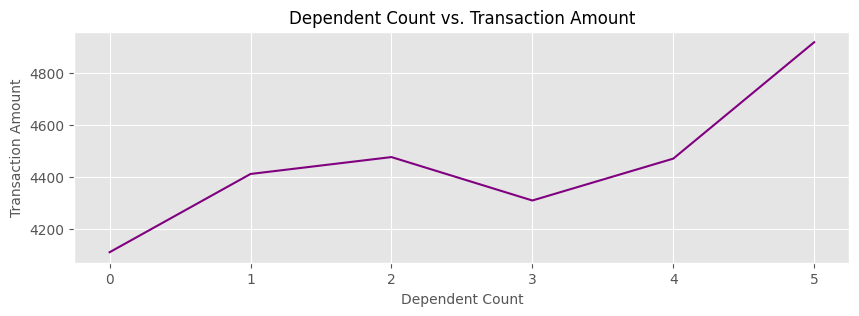

In [ ]:
# visualize the relationship between dependent count and transaction amount
sns.lineplot(
    data = df,
    x = 'Dependent_Ct',
    y = 'Total_Trans_Amt',
    estimator = 'mean',
    color = 'purple',
    errorbar = None
    )
plt.xlabel('Dependent Count', fontsize = 10)
plt.ylabel('Transaction Amount', fontsize = 10)
plt.title('Dependent Count vs. Transaction Amount', fontsize = 12)
plt.show()


**Observations** <br>

- *Positive correlation* <br>
There appears to be a positive correlation between dependent count and transaction amount, suggesting that as the number of dependents increases, so does the total transaction amount. <br>

- *Nonlinearity* <br>
The relationship between the two variables is not strictly linear. The slope of the line changes as the dependent count increases, indicating a nonlinear relationship. <br>

Overall, the plot suggests that having more dependents is associated with higher transaction amounts, but the relationship is not simply linear. Other factors, such as income, lifestyle, and individual preferences, may also influence spending patterns. Also, one more thing to notice is the drop off transactions for dependent counts of 3, which need to be discovered why via further analysis.



---



## Debt Analysis

### Credit Limit vs. Revolving Balance

In [ ]:
df['Credit_Limit'].describe()


count    10127.000000
mean      8631.953698
std       9088.776650
min       1438.300000
25%       2555.000000
50%       4549.000000
75%      11067.500000
max      34516.000000
Name: Credit_Limit, dtype: float64

In [ ]:
df['Total_Revolving_Bal'].describe()


count    10127.000000
mean      1162.814061
std        814.987335
min          0.000000
25%        359.000000
50%       1276.000000
75%       1784.000000
max       2517.000000
Name: Total_Revolving_Bal, dtype: float64

In [ ]:
# check exceptions of revolving balance above credit limit
df[df['Total_Revolving_Bal'] > df['Credit_Limit']]


Empty DataFrame
Columns: [Client_Num, Attrition_Flag, Customer_Age, Gender, Dependent_Ct, Education_Level, Marital_Status, Income_Category, Card_Category, Months_On_Book, Total_Relationship_Ct, Months_Inactive_12_Mon, Contacts_Ct_12_Mon, Credit_Limit, Total_Revolving_Bal, Avg_Open_To_Buy, Total_Amt_Chng_Q4_Q1, Total_Trans_Amt, Total_Trans_Ct, Total_Ct_Chng_Q4_Q1, Avg_Utilization_Ratio]
Index: []

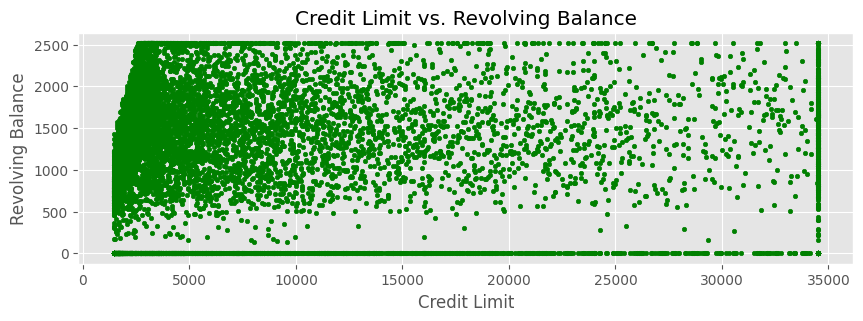

In [ ]:
# visualize credit limit and revolving balance
plt.scatter(df['Credit_Limit'], df['Total_Revolving_Bal'], s = 10, color = 'green', edgecolor = None)
plt.xlabel('Credit Limit')
plt.ylabel('Revolving Balance')
plt.title('Credit Limit vs. Revolving Balance')
plt.show()


**Observations** <br>

- *Dense Distribution at Lower Credit Limits* <br>
The plot shows that the majority of the points are concentrated in the lower range of the credit limits (below 15,000). This suggests that most customers have relatively low credit limits.

- *Revolving Balance at Zero* <br>
A significant number of data points align along the y axis. These customers have no revolving balance despite having varying credit limits, possibly indicating they pay off their balance in full regularly or they have inactive accounts.

- *No Clear Trend* <br>
There doesn't appear to be a clear linear or exponential relationship between credit limit and revolving balance. This suggests that having a higher credit limit does not necessarily mean a higher revolving balance.

- *Outliers* <br>
Some customers have high credit limits (near 35,000) but have relatively low revolving balances. These could be outliers or indicate customers who have high credit availability but choose not to use it extensively.

Overall, this scatter plot suggests a varied distribution of revolving balances across credit limits, but no strong correlation is immediately visible.



---



### Average Utalization Ratio

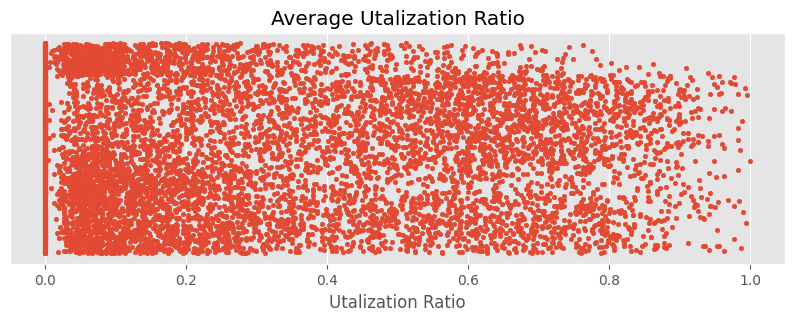

In [ ]:
# visualize average utalization ratio for each customer
plt.scatter(df['Avg_Utilization_Ratio'], df.index, s = 10, edgecolor = None)
plt.title('Average Utalization Ratio')
plt.xlabel('Utalization Ratio')
plt.ylabel('')
plt.yticks([])
plt.show()


In the above scatter plot, we can notice that majority of points are concentated on low Utilization Ratio. Let's make segmentation to define the financial state of different client segments.



---



#### Use Average Utilization Ratio to Indicate Financial Strain

In [ ]:
# add a column to indicate financial state risk level
X = df.copy()
X['debt_risk_indicator'] = X['Avg_Utilization_Ratio'].apply(
    lambda x: 'high risk' if x >= 0.8 else ('low risk' if x <= 0.2 else 'moderate risk')
    )
X[['Avg_Utilization_Ratio', 'debt_risk_indicator']]


Avg_Utilization_Ratio debt_risk_indicator
0                      0.061            low risk
1                      0.105            low risk
2                      0.000            low risk
3                      0.760       moderate risk
4                      0.000            low risk
...                      ...                 ...
10122                  0.462       moderate risk
10123                  0.511       moderate risk
10124                  0.000            low risk
10125                  0.000            low risk
10126                  0.189            low risk

[10127 rows x 2 columns]

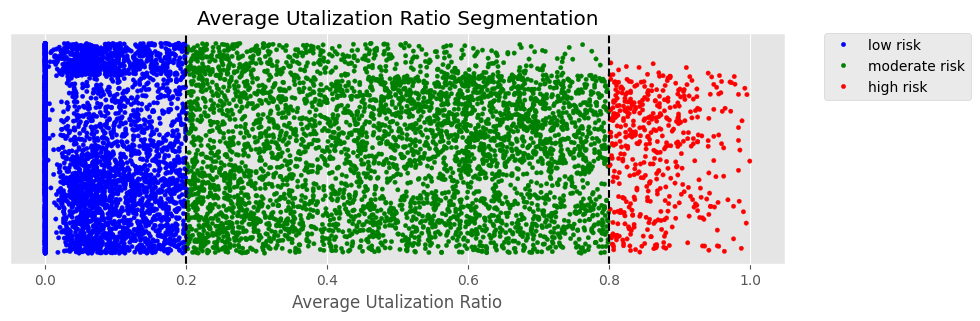

In [ ]:
# visualize average utalization ratio for each customer according to financial state risk indicator column
sns.scatterplot(
    x = X['Avg_Utilization_Ratio'],
    y = X.index,
    hue = X['debt_risk_indicator'],
    s = 10,
    edgecolor = None,
    palette = ['blue', 'green', 'red']
    )
plt.axvline(x = 0.2, color = 'black', linestyle = '--')
plt.axvline(x = 0.8, color = 'black', linestyle = '--')
plt.legend(bbox_to_anchor = (1.05, 1), loc = 'upper left', borderaxespad = 0.)
plt.title('Average Utalization Ratio Segmentation')
plt.xlabel('Average Utalization Ratio')
plt.ylabel('')
plt.yticks([])
plt.show()


**Financial Strain Indicator Segmentation according to Utilization Ratio** <br>

The segmentation of clients based on their average utilization ratio (as shown in the above scatter plot) is a practical approach to indicate different levels of financial risk or strain.

- *Low Risk (Blue, Utilization ≤ 0.2)* <br>
These customers have a low utilization ratio, typically below 20%. They are considered low risk because they are using a small portion of their available credit, indicating they are not financially strained and manage their credit responsibly.
The dense cluster of points here suggests a large number of clients fall into this category, possibly reflecting good credit behavior or customers with higher credit limits who do not utilize much of it.
<br>
- *Moderate Risk (Green, Utilization between 0.2 and 0.8)* <br>
Customers in this range are categorized as moderate risk. They are utilizing between 20% and 80% of their available credit, indicating they may be dependent on credit but are not necessarily at high risk yet.
The moderate risk group forms the largest segment in this plot, highlighting that many customers are in a zone where they are neither in significant financial strain nor completely free from risk.
<br>
- *High Risk (Red, Utilization ≥ 0.8)* <br>
These customers are considered high risk due to their high utilization ratio (above 80%). A high utilization ratio often indicates financial stress, as these customers are heavily reliant on credit and could struggle with repayment.
The distribution of red points is also quite dense, suggesting that a significant number of customers may be at risk of financial trouble.
<br>

But I will develop another accurate clustering model using KMeans clustering later in the unsupervised learning section.



---



## Customers Inactivity Analysis

### Revolving Balance and Months Inactive in 12 Months

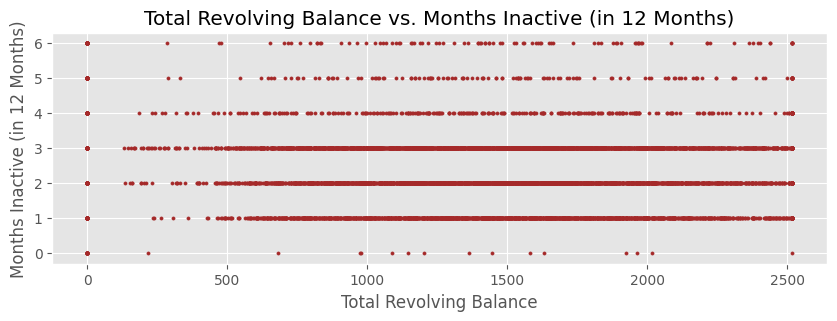

In [ ]:
# visualize revolving balance against months inactive
plt.scatter(df['Total_Revolving_Bal'], df['Months_Inactive_12_Mon'], s = 5, color = 'brown')
plt.xlabel('Total Revolving Balance')
plt.ylabel('Months Inactive (in 12 Months)')
plt.title('Total Revolving Balance vs. Months Inactive (in 12 Months)')
plt.show()


In [ ]:
# create a column that indicates inactivity risk level

X = df.copy()
months_threshold = 3
balance_threshold = 1250.

# define conditions for the new column (inactivity_risk_indicator)
conditions = [
    (X['Months_Inactive_12_Mon'] >= months_threshold) & (X['Total_Revolving_Bal'] >= balance_threshold),
    (X['Months_Inactive_12_Mon'] >= months_threshold) & (X['Total_Revolving_Bal'] < balance_threshold),
    (X['Months_Inactive_12_Mon'] < months_threshold)
    ]

# define the corresponding risk levels
risk_levels = ['high risk', 'moderate risk', 'low risk']

# create the new column
X['inactivity_risk_indicator'] = np.select(conditions, risk_levels)

# view the updated dataframe
X[['Total_Revolving_Bal', 'Months_Inactive_12_Mon', 'inactivity_risk_indicator']]


Total_Revolving_Bal  Months_Inactive_12_Mon inactivity_risk_indicator
0                      777                       1                  low risk
1                      864                       1                  low risk
2                        0                       1                  low risk
3                     2517                       4                 high risk
4                        0                       1                  low risk
...                    ...                     ...                       ...
10122                 1851                       2                  low risk
10123                 2186                       2                  low risk
10124                    0                       3             moderate risk
10125                    0                       3             moderate risk
10126                 1961                       2                  low risk

[10127 rows x 3 columns]

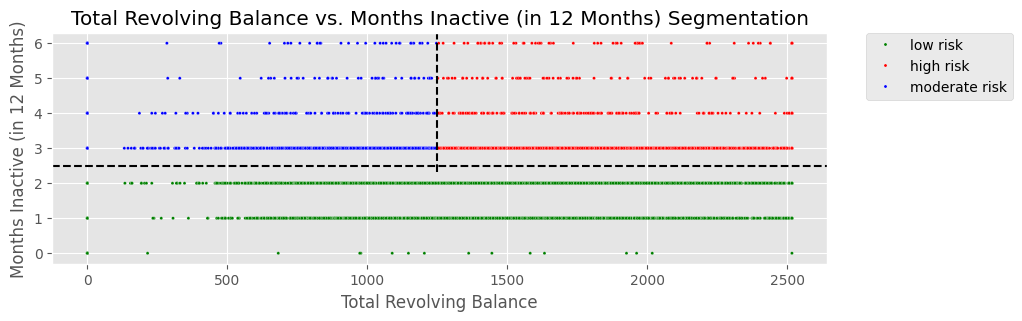

In [ ]:
# visualize months inactive and inactivity risk level
sns.scatterplot(
    data = X,
    x = 'Total_Revolving_Bal',
    y = 'Months_Inactive_12_Mon',
    hue = 'inactivity_risk_indicator',
    s = 5,
    palette = ['green', 'red', 'blue']
    )
plt.axvline(x = 1250., color = 'black', linestyle = '--', ymin = 2.5/plt.gca().get_ylim()[1])
plt.axhline(y = 2.5, color = 'black', linestyle = '--')
plt.legend(bbox_to_anchor = (1.05, 1), loc = 'upper left', borderaxespad = 0.)
plt.xlabel('Total Revolving Balance')
plt.ylabel('Months Inactive (in 12 Months)')
plt.title('Total Revolving Balance vs. Months Inactive (in 12 Months) Segmentation')
plt.show()


**Financial Strain Indicator Segmentation according to Inactivity and Revolving Balance** <br>

The above scatter plot shows the relationship between the total revolving balance of customers and their months of inactivity. Based on the visualization, the data appears to be segmented into three risk categories:

- *Low Risk* <br>
Customers with a low number of inactive months.
- *Moderate Risk* <br>
Customers with low revolving balance and a high number of inactive months.
- *High Risk* <br>
Customers with a high revolving balance and a high number of inactive months.

This segmentation aligns with the general intuition that customers with both high revolving balances and extended periods of inactivity are more likely to be at risk of financial strain. However, to know that we must consider additional factors when assessing customer risk, such as credit history, income level, and other demographic information.



---



### Credit Limit and Months Inactive in 12 Months

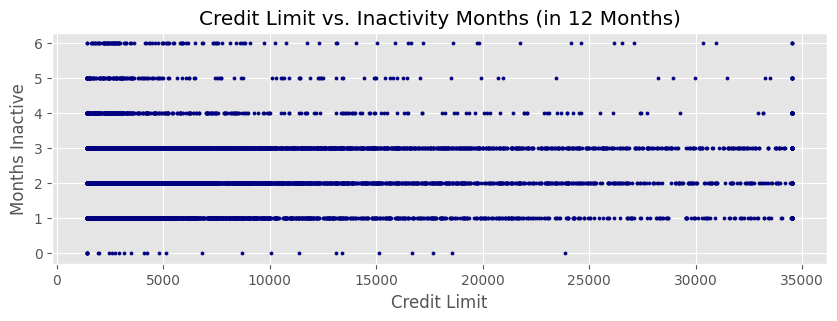

In [ ]:
# visualize credit limit and months inactive in 12 months
plt.scatter(df['Credit_Limit'], df['Months_Inactive_12_Mon'], s = 5, edgecolor = None, color = 'navy')
plt.xlabel('Credit Limit')
plt.ylabel('Months Inactive')
plt.title('Credit Limit vs. Inactivity Months (in 12 Months)')
plt.show()


In [ ]:
# create a column that indicates inactivity risk level

X = df.copy()
months_threshold = 3
credit_threshold = 17500.

# define conditions for the new column (inactivity_risk_indicator)
conditions = [
    (X['Months_Inactive_12_Mon'] >= months_threshold) & (X['Credit_Limit'] >= credit_threshold),
    (X['Months_Inactive_12_Mon'] >= months_threshold) & (X['Credit_Limit'] < credit_threshold),
    (X['Months_Inactive_12_Mon'] < months_threshold)
    ]

# define the corresponding risk levels
risk_levels = ['high risk', 'moderate risk', 'low risk']

# create the new column
X['inactivity_risk_indicator'] = np.select(conditions, risk_levels)

# view the updated dataframe
X[['Credit_Limit', 'Months_Inactive_12_Mon', 'inactivity_risk_indicator']]


Credit_Limit  Months_Inactive_12_Mon inactivity_risk_indicator
0           12691.0                       1                  low risk
1            8256.0                       1                  low risk
2            3418.0                       1                  low risk
3            3313.0                       4             moderate risk
4            4716.0                       1                  low risk
...             ...                     ...                       ...
10122        4003.0                       2                  low risk
10123        4277.0                       2                  low risk
10124        5409.0                       3             moderate risk
10125        5281.0                       3             moderate risk
10126       10388.0                       2                  low risk

[10127 rows x 3 columns]

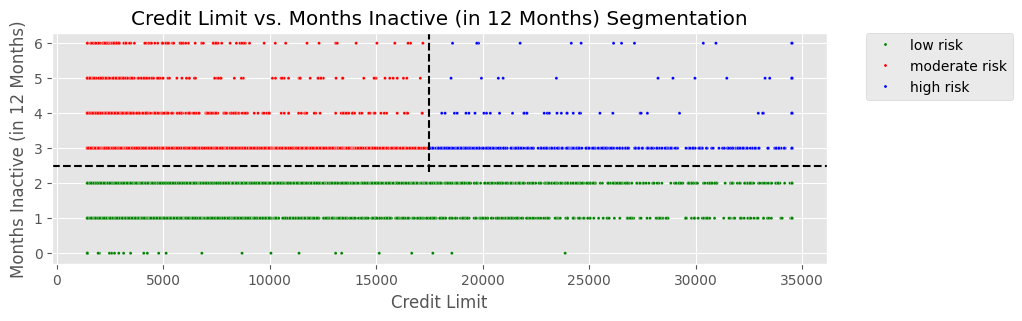

In [ ]:
# visualize months inactive and inactivity risk level
sns.scatterplot(
    data = X,
    x = 'Credit_Limit',
    y = 'Months_Inactive_12_Mon',
    hue = 'inactivity_risk_indicator',
    s = 5,
    palette = ['green', 'red', 'blue']
    )
plt.axvline(x = 17500., color = 'black', linestyle = '--', ymin = 2.5/plt.gca().get_ylim()[1])
plt.axhline(y = 2.5, color = 'black', linestyle = '--')
plt.legend(bbox_to_anchor = (1.05, 1), loc = 'upper left', borderaxespad = 0.)
plt.xlabel('Credit Limit')
plt.ylabel('Months Inactive (in 12 Months)')
plt.title('Credit Limit vs. Months Inactive (in 12 Months) Segmentation')
plt.show()


**Financial Strain Indicator Segmentation according to Inactivity and Credit Limit** <br>

The above scatter plot shows the relationship between the credit limit of customers and their months of inactivity. Based on the visualization, the data appears to be segmented into three risk categories:

- *Low Risk* <br>
Customers with a low number of inactive months.
- *Moderate Risk* <br>
Customers with low credit limit and a high number of inactive months.
- *High Risk* <br>
Customers with high credit limit and a high number of inactive months.

This segmentation aligns with the general intuition that customers with both high credit limits and extended periods of inactivity are more likely to be at risk of financial strain.



---



### Months Inactive in 12 Months and Contacts in 12 Months

In [ ]:
# inactivity and number of contacts

# indicate if there are some problems with customers which results in lots of contacts
inactivity_contacts = pd.DataFrame(df.groupby('Months_Inactive_12_Mon')['Contacts_Ct_12_Mon'].mean().round())
print(inactivity_contacts)


                        Contacts_Ct_12_Mon
Months_Inactive_12_Mon                    
0                                      3.0
1                                      2.0
2                                      2.0
3                                      2.0
4                                      3.0
5                                      2.0
6                                      2.0


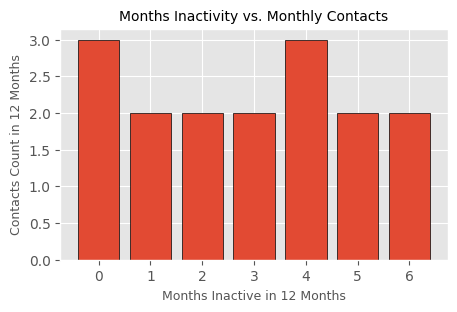

In [ ]:
# visualize contacts count according to months inactive
plt.figure(figsize = (5, 3))
plt.bar(inactivity_contacts.index, inactivity_contacts['Contacts_Ct_12_Mon'], edgecolor = 'k')
plt.xlabel('Months Inactive in 12 Months', fontsize = 9)
plt.ylabel('Contacts Count in 12 Months', fontsize = 9)
plt.title('Months Inactivity vs. Monthly Contacts', fontsize = 10)
plt.show()


**Observations** <br>

In the above bar graph, it appears that there are a lot of contacts made with the customers that are inactive for more than 2 months. This might indicate a strong relationship between the inactivity period and contacting. May be there are some problem with their accounts needs to be discovered.



---



## Churn Analysis

In [ ]:
# extract different values for Attrition_Flag column
df_not_churned = df[df['Attrition_Flag'] == 'Existing Customer']
df_churned = df[df['Attrition_Flag'] == 'Attrited Customer']




---



### Customer Age, Months on Book, and Credit Limit

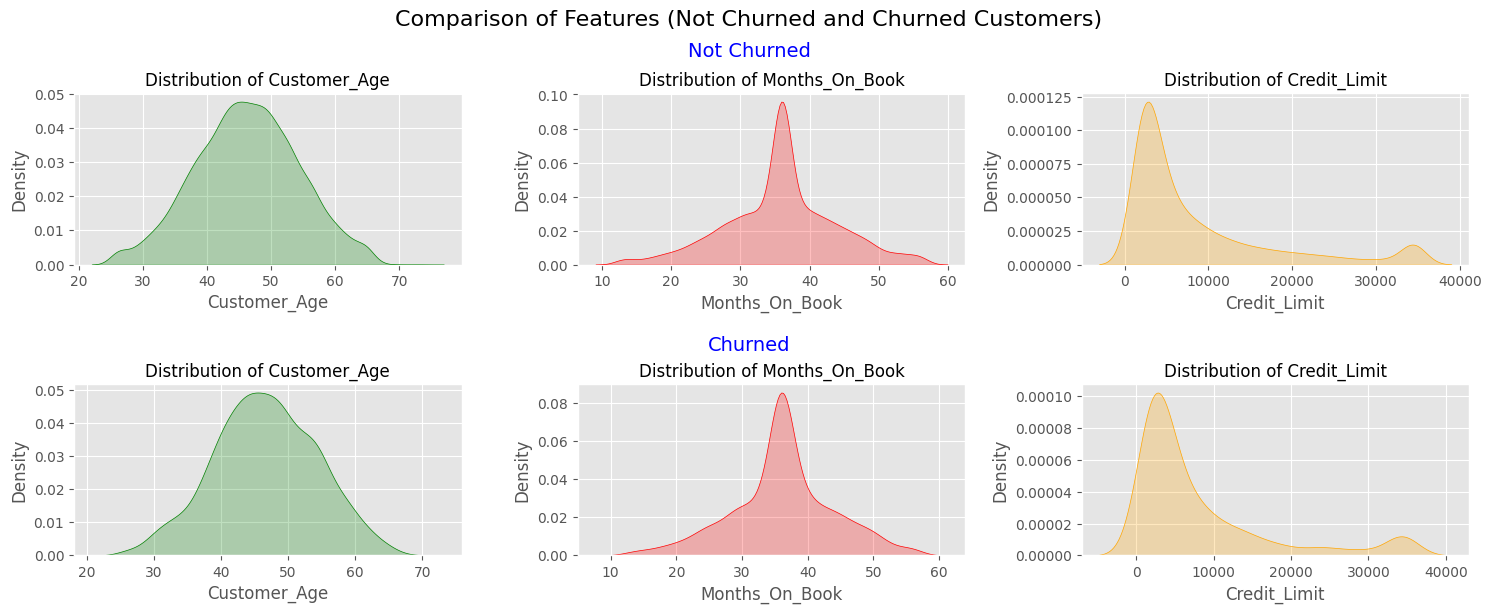

In [ ]:
# list of features and their corresponding colors
features = [
    ('Customer_Age', 'green'),
    ('Months_On_Book', 'red'),
    ('Credit_Limit', 'orange')
    ]

# create subplots
fig, axs = plt.subplots(2, 3, figsize=(18, 6))

# loop through each feature and plot in df_not_churned
for i, (feature, color) in enumerate(features):
    row, col = divmod(i, 3)
    sns.kdeplot(df_not_churned[feature], ax = axs[0, col], color = color, fill = True)
    axs[0, col].set_title(f'Distribution of {feature}', fontsize = 12)

# loop through each feature and plot in df_churned
for i, (feature, color) in enumerate(features):
    row, col = divmod(i, 3)
    sns.kdeplot(df_churned[feature], ax = axs[1, col], color = color, fill = True)
    axs[1, col].set_title(f'Distribution of {feature}', fontsize = 12)

# add supertitles
fig.suptitle('Comparison of Features (Not Churned and Churned Customers)', fontsize = 16, y = 1.02)
plt.text(0.5, 0.95, 'Not Churned', ha = 'center', va = 'center', fontsize = 14, color = 'blue', transform = fig.transFigure)
plt.text(0.5, 0.46, 'Churned', ha = 'center', va = 'center', fontsize = 14, color = 'blue', transform = fig.transFigure)

# adjust layout
plt.subplots_adjust(wspace = 0.3, hspace = 0.7)
plt.show()


**Observations** <br>

The density plots above provide a visual representation of the distribution of customer age, months on book, and credit limit for both churned and not churned customers. Based on the plots, we can observe the following:

- *Customer Age* <br>
  The age distribution for churned and not churned customers is relatively similar, with a slight skew towards the younger age range for churned customers.

- *Months on Book* <br>
  Churned customers tend to have a slightly lower average time on book compared to not churned customers. This suggests that customers who have been with the company for a longer period are less likely to churn. So if we can pass the first period of new clients, we will be gaining the loyality of those client.

- *Credit Limit* <br>
  The credit limit distribution for churned customers shows a slight shift towards lower credit limits compared to not churned customers. This indicates that customers with higher credit limits are less likely to churn. May be we can start offering higher credit limit for those with already low credit limit to motivate them to use the credit card more.

Overall, the density plots suggest that churned customers are more likely to be younger, have been with the company for a shorter period, and have lower credit limits compared to not churned customers.



---



### Revolving Balance, Open To Buy, and Transaction Amount

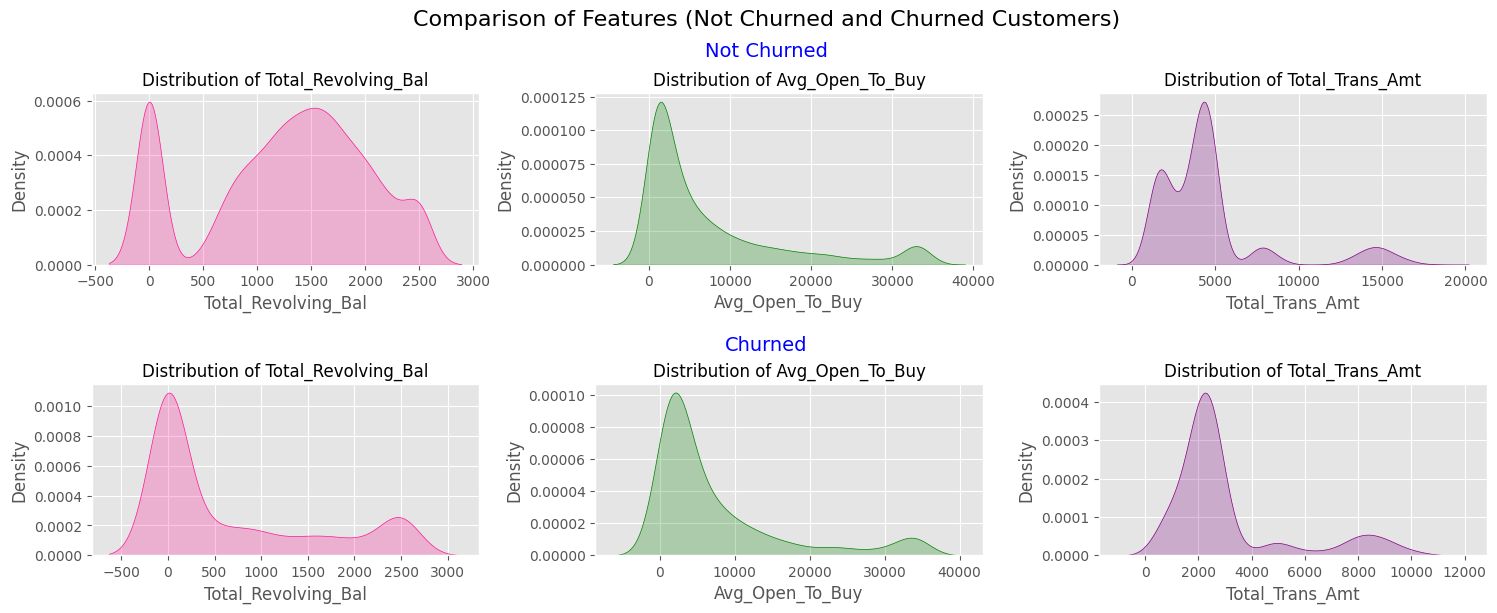

In [ ]:
# list of features and their corresponding colors
features = [
    ('Total_Revolving_Bal', 'deeppink'),
    ('Avg_Open_To_Buy', 'green'),
    ('Total_Trans_Amt', 'purple')
    ]

# create subplots
fig, axs = plt.subplots(2, 3, figsize=(18, 6))

# loop through each feature and plot in df_not_churned
for i, (feature, color) in enumerate(features):
    row, col = divmod(i, 3)
    sns.kdeplot(df_not_churned[feature], ax = axs[0, col], color = color, fill = True)
    axs[0, col].set_title(f'Distribution of {feature}', fontsize = 12)

# loop through each feature and plot in df_churned
for i, (feature, color) in enumerate(features):
    row, col = divmod(i, 3)
    sns.kdeplot(df_churned[feature], ax = axs[1, col], color = color, fill = True)
    axs[1, col].set_title(f'Distribution of {feature}', fontsize = 12)

# adjust layout
fig.suptitle('Comparison of Features (Not Churned and Churned Customers)', fontsize = 16, y = 1.02)
plt.text(0.5, 0.95, 'Not Churned', ha = 'center', va = 'center', fontsize = 14, color = 'blue', transform = fig.transFigure)
plt.text(0.5, 0.46, 'Churned', ha = 'center', va = 'center', fontsize = 14, color = 'blue', transform = fig.transFigure)
plt.subplots_adjust(wspace = 0.3, hspace = 0.7)
plt.show()


**Observations** <br>

The density plots above provide a visual representation of the distribution of total revolving balance, average open to buy, and total transaction amount for both churned and not churned customers. Based on the plots, we can observe the following:

- *Total Revolving Balance* <br>
  The distribution of total revolving balance for churned customers is skewed towards the lower end compared to not churned customers. This suggests that customers with higher revolving balances are less likely to churn, which is the main target to a credit card system.

- *Average Open to Buy* <br>
  The distribution of average open to buy for churned customers is also skewed towards the lower end compared to not churned customers. This indicates that customers with higher available credit limits are less likely to churn.

- *Total Transaction Amount* <br>
  There appears to be a slight difference in the distribution of total transaction amount between churned and not churned customers. While the overall shape of the distributions is similar, churned customers might have a slightly lower average transaction amount compared to not churned customers.

Overall, the density plots suggest that churned customers tend to have lower total revolving balances, lower average open to buy, and potentially lower total transaction amounts compared to not churned customers.



---



### Transaction Count, Count Change from Quarter 4 To Quarter 1, and Utalization Ratio

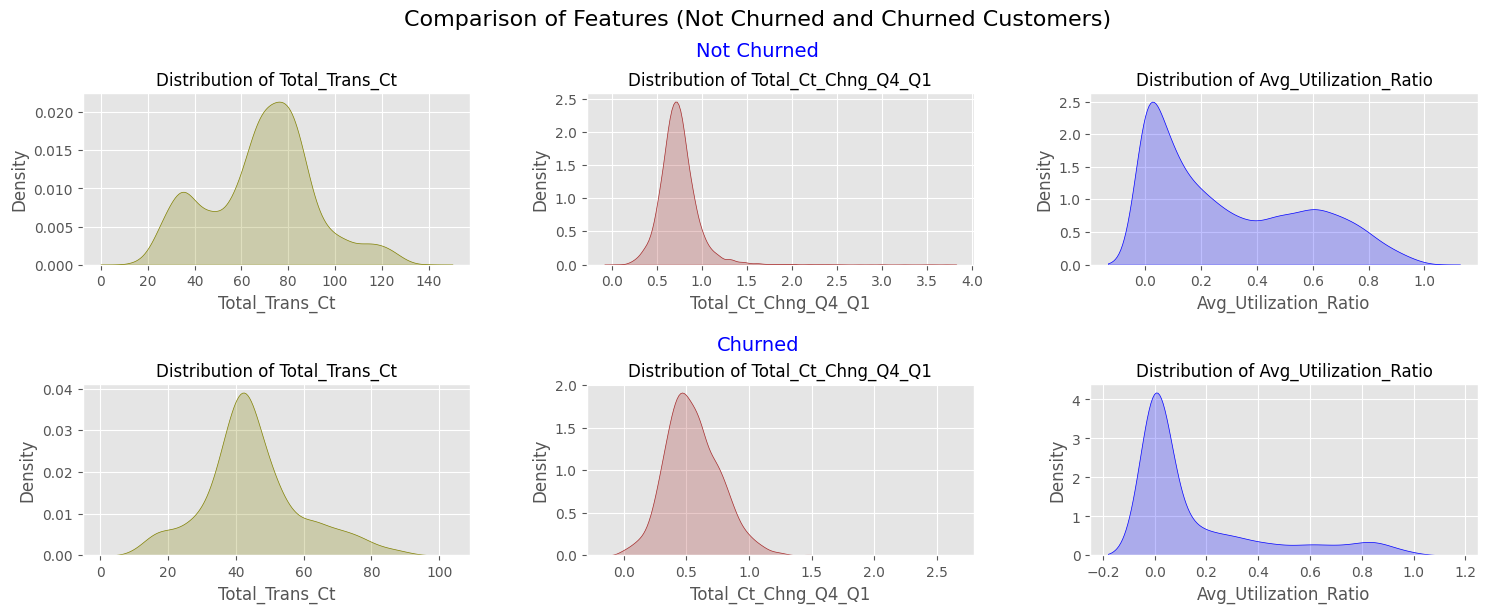

In [ ]:
# list of features and their corresponding colors
features = [
    ('Total_Trans_Ct', 'olive'),
    ('Total_Ct_Chng_Q4_Q1', 'brown'),
    ('Avg_Utilization_Ratio', 'blue')
    ]

# create subplots
fig, axs = plt.subplots(2, 3, figsize=(18, 6))

# loop through each feature and plot in df_not_churned
for i, (feature, color) in enumerate(features):
    row, col = divmod(i, 3)
    sns.kdeplot(df_not_churned[feature], ax = axs[0, col], color = color, fill = True)
    axs[0, col].set_title(f'Distribution of {feature}', fontsize = 12)

# loop through each feature and plot in df_churned
for i, (feature, color) in enumerate(features):
    row, col = divmod(i, 3)
    sns.kdeplot(df_churned[feature], ax = axs[1, col], color = color, fill = True)
    axs[1, col].set_title(f'Distribution of {feature}', fontsize = 12)

# adjust layout
fig.suptitle('Comparison of Features (Not Churned and Churned Customers)', fontsize = 16, y = 1.02)
plt.text(0.5, 0.95, 'Not Churned', ha = 'center', va = 'center', fontsize = 14, color = 'blue', transform = fig.transFigure)
plt.text(0.5, 0.46, 'Churned', ha = 'center', va = 'center', fontsize = 14, color = 'blue', transform = fig.transFigure)
plt.subplots_adjust(wspace = 0.3, hspace = 0.7)
plt.show()


**Observations** <br>

The density plots above provide a visual representation of the distribution of total transaction count, total count change quarter-over-quarter, and average utilization ratio for both churned and not churned customers. Based on the plots, we can observe the following:

- *Total Transaction Count* <br>
  The distribution of total transaction count for churned customers is skewed towards the lower end compared to not churned customers. This suggests that customers with higher transaction activity are less likely to churn.

- *Total Count Change Quarter-over-Quarter* <br>
  The distribution of total count change quarter-over-quarter for churned customers is also skewed towards the lower end compared to not churned customers. This indicates that customers with increasing transaction activity are less likely to churn.

- *Average Utilization Ratio* <br>
  The distribution of average utilization ratio for churned customers is slightly skewed towards the higher end compared to not churned customers. This suggests that customers with low credit card utilization are more likely to churn.

Overall, the density plots suggest that churned customers tend to have lower total transaction counts, lower total count change quarter-over-quarter, and potentially lower average utilization ratios compared to not churned customers.

✨✨✨✨✨✨✨✨✨✨✨✨✨✨✨✨✨✨✨✨✨✨✨✨✨✨✨✨✨✨✨✨✨✨✨✨✨✨✨✨✨✨✨✨✨✨

# Unsupervised Learning (Clustering Analysis)

## Functions

### Elbow Function

In [ ]:
def kmeans_cluster_elbow(X, k_max):

  '''
  Generates the "elbow curve" for the K-Means clustering algorithm to help determine the optimal number of clusters.

  The function iteratively fits K-Means models to the data for a range of cluster values (from 1 to `k_max`), calculates
  the inertia (sum of squared distances of samples to their closest cluster center) for each value of k, and plots
  the results. The "elbow" in the graph represents a point where the inertia starts decreasing at a slower rate,
  suggesting the optimal number of clusters.

  Parameters:
  -----------
  X : array-like or DataFrame
      The dataset on which the K-Means clustering algorithm will be applied. It should be in the form of a 2D array,
      where rows represent samples and columns represent features.

  k_max : int
      The maximum number of clusters (k) to evaluate. The function will fit K-Means for k values from 1 to `k_max`.

  Returns:
  --------
    None
      This function does not return a value. It generates a plot displaying the "elbow curve" that visualizes the
      relationship between the number of clusters (k) and the inertia.

  Example:
  --------
  >>> X, _ = make_blobs(n_samples=300, centers=4, random_state=42)
  >>> kmeans_cluster_elbow(X, 10)
  (This would plot the elbow curve to determine the optimal number of clusters)
  '''

  means = []
  inertias = []
  for k in range(1, k_max):
    model = KMeans(n_clusters = k, random_state = 7, n_init = 'auto').fit(X)
    means.append(k)
    inertias.append(model.inertia_)

  plt.figure(figsize = (10, 3))
  plt.plot(means, inertias)
  plt.title('K-Means Elbow Curve')
  plt.xlabel('Number of Clusters')
  plt.ylabel('Inertia')
  plt.show()


### 1-D Clustering Function

In [ ]:
def plot_1d_clusters_with_variable_cluster_numbers(X, column_name, real_column_name):

    '''
    Plots 1D KMeans clustering results with varying numbers of clusters on a single feature/column.

    This function creates a grid of scatter plots displaying the results of KMeans clustering with cluster numbers
    ranging from 2 to 7, using one specified feature from the input dataset. Each subplot corresponds to a different
    number of clusters, and the points are color-coded based on their assigned cluster labels.

    Parameters:
    -----------
    X : DataFrame
        The dataset to be clustered. It must contain at least one column corresponding to the feature specified by
        `column_name`, which will be used for clustering and visualization.

    column_name : str
        The name of the column in `X` that represents the feature for clustering and plotting on the x-axis.

    real_column_name : str
        The descriptive name of the feature that will be displayed as the x-axis label in the plots. This is used
        for readability, as `real_column_name` is shown on the axis instead of `column_name`.

    Returns:
    --------
    None
        This function does not return any value. It generates a grid of scatter plots, where each plot shows the results
        of KMeans clustering with a different number of clusters (from 2 to 7).

    Example:
    --------
    >>> plot_1d_clusters_with_variable_cluster_numbers(df, 'Avg_Utilization_Ratio', 'Average Utilization Ratio')
    (This would display a 3x2 grid of scatter plots showing KMeans clusters with 2 to 7 cluster centers)
    '''

    # create a 3x2 subplot grid
    fig, axes = plt.subplots(3, 2, figsize = (10, 9))
    axes = axes.flatten()  # flatten the 2D array of axes to make it easier to iterate

    # loop through the cluster values and add scatter plots to the grid
    for i, n_clusters in enumerate(range(2, 8)):
        # fit the kmeans model
        model = KMeans(n_clusters = n_clusters, random_state = 7, n_init = 'auto').fit(X)

        # get the cluster labels
        labels = model.labels_

        # plot scatter plot on the corresponding subplot
        axes[i].scatter(X[column_name], np.arange(len(X)), c = labels, cmap = 'viridis', marker = 'o', s = 15)
        axes[i].set_title(f'{n_clusters} Clusters')
        axes[i].set_xlabel(real_column_name)
        axes[i].set_yticks([])  # hide y-axis labels

    # adjust layout and add a global title
    fig.suptitle(f'{real_column_name} - KMeans Clustering with Varying Cluster Numbers', fontsize = 16)
    plt.tight_layout(rect = [0, 0, 1, 0.96], pad = 2)
    plt.show()


### 2-D Clustering Function (KMeans)

In [ ]:
def plot_2d_clusters_with_variable_cluster_numbers(X, column_name_1, column_name_2, real_column_name_1, real_column_name_2):

    '''
    Plots 2D KMeans clustering results with varying numbers of clusters on two features/columns.

    This function creates a grid of scatter plots displaying the results of KMeans clustering with cluster numbers
    ranging from 2 to 7, using two specified features from the input dataset. Each subplot corresponds to a different
    number of clusters, and the points are color-coded based on their assigned cluster labels.

    Parameters:
    -----------
    X : DataFrame
        The dataset to be clustered. It must contain at least two columns corresponding to the features specified
        by `column_name_1` and `column_name_2`, which will be used for clustering and visualization.

    column_name_1 : str
        The name of the column in `X` that represents the first feature for clustering and plotting on the x-axis.

    column_name_2 : str
        The name of the column in `X` that represents the second feature for clustering and plotting on the y-axis.

    real_column_name_1 : str
        The descriptive name of the first feature (used for x-axis labeling) that will be displayed in the plots.

    real_column_name_2 : str
        The descriptive name of the second feature (used for y-axis labeling) that will be displayed in the plots.

    Returns:
    --------
    None
        This function does not return any value. It generates a grid of scatter plots, where each plot shows the results
        of KMeans clustering with a different number of clusters (from 2 to 7) using the specified features.

    Example:
    --------
    >>> plot_2d_clusters_with_variable_cluster_numbers(df, 'Credit_Limit', 'Total_Trans_Amt', 'Credit Limit', 'Total Transaction Amount')
    (This would display a 3x2 grid of scatter plots showing KMeans clusters with 2 to 7 cluster centers based on the two features)
    '''

    # create a 3x2 subplot grid
    fig, axes = plt.subplots(3, 2, figsize=(10, 9))
    axes = axes.flatten()  # flatten the 2D array of axes to make it easier to iterate

    # Loop through the cluster values and add scatter plots to the grid
    for i, n_clusters in enumerate(range(2, 8)):

        # fit the KMeans model
        model = KMeans(n_clusters = n_clusters, random_state = 7, n_init = 'auto').fit(X)

        # get the cluster labels
        labels = model.labels_

        # plot scatter plot on the corresponding subplot
        axes[i].scatter(X[column_name_1], X[column_name_2], c = labels, cmap = 'viridis', marker = 'o', s = 15)
        axes[i].set_title(f'{n_clusters} Clusters')
        axes[i].set_xlabel(real_column_name_1, fontsize = 10)
        axes[i].set_ylabel(real_column_name_2, fontsize = 10)

    # adjust layout and add a global title
    fig.suptitle(
        f'Relationship Between {real_column_name_1} & {real_column_name_2} - K-Means Clustering with Varying Cluster Numbers',
        fontsize = 12
        )
    plt.tight_layout(rect = [0, 0, 1, 0.96], pad = 2)
    plt.show()


### 2-D Clustering Function (DBSCAN)

In [ ]:
def plot_2d_clusters_with_variable_eps_min_samples(
    X, column_name_1, column_name_2, real_column_name_1, real_column_name_2, epsilon, min_samples
    ):

    '''
    Plots 2D DBSCAN clustering results with varying epsilon and min_samples values on two features/columns.

    This function generates a row of scatter plots showing DBSCAN clustering results on two specified features
    from the input dataset. It varies the epsilon and min_samples values used by DBSCAN across three different
    scale factors (0.8, 1.0, 1.2), showing how the clustering output changes with different parameters.

    Parameters:
    -----------
    X : DataFrame
        The dataset to be clustered. It must contain at least two columns corresponding to the features specified
        by `column_name_1` and `column_name_2`, which will be used for clustering and visualization.

    column_name_1 : str
        The name of the column in `X` that represents the first feature for clustering and plotting on the x-axis.

    column_name_2 : str
        The name of the column in `X` that represents the second feature for clustering and plotting on the y-axis.

    real_column_name_1 : str
        The descriptive name of the first feature (used for x-axis labeling) that will be displayed in the plots.

    real_column_name_2 : str
        The descriptive name of the second feature (used for y-axis labeling) that will be displayed in the plots.

    epsilon : float
        The base value of epsilon for the DBSCAN algorithm, representing the maximum distance between two points
        to be considered as neighbors.

    min_samples : int
        The base value for the minimum number of points required to form a dense region (i.e., a cluster) in DBSCAN.

    Returns:
    --------
    None
        This function does not return any value. It generates a row of scatter plots showing DBSCAN clusters
        with varying epsilon and min_samples values across three different scales (0.8x, 1.0x, and 1.2x).

    Example:
    --------
    >>> plot_2d_clusters_with_variable_eps_min_samples(
                              df, 'Credit_Limit', 'Total_Trans_Amt', 'Credit Limit', 'Total Transaction Amount', 0.5, 5
                              )
    (This would display a 1x3 grid of scatter plots showing DBSCAN clusters with varying epsilon and min_samples values)
    '''

    # scale factors for epsilon and min_samples
    scale_factors = [0.8, 1.0, 1.2]

    # create a 1x3 subplot grid
    fig, axes = plt.subplots(1, 3, figsize=(15, 5))

    # iterate over scale factors to adjust epsilon and min_samples
    for i, scale in enumerate(scale_factors):
        # adjust epsilon and min_samples
        eps_value = epsilon * scale
        min_samples_value = int(min_samples * scale)

        # fit the dbscan model
        model = DBSCAN(eps = eps_value, min_samples = min_samples_value).fit(X)

        # get the cluster labels
        labels = model.labels_

        # plot scatter plot on the corresponding subplot
        axes[i].scatter(X[column_name_1], X[column_name_2], c = labels, cmap = 'viridis', marker = 'o', s = 15)
        axes[i].set_title(f'ε = {eps_value:.2f}, min_samples = {min_samples_value}')
        axes[i].set_xlabel(real_column_name_1, fontsize = 10)
        axes[i].set_ylabel(real_column_name_2, fontsize = 10)

    # adjust layout and add a global title
    fig.suptitle(
        f'Relationship Between {real_column_name_1} & {real_column_name_2} - DBSCAN Clustering with Varying Epsilon and min_samples',
        fontsize = 12
        )
    plt.tight_layout(rect = [0, 0, 1, 0.96], pad = 2)
    plt.show()




---



## 1-D Clustering

### Credit Limit

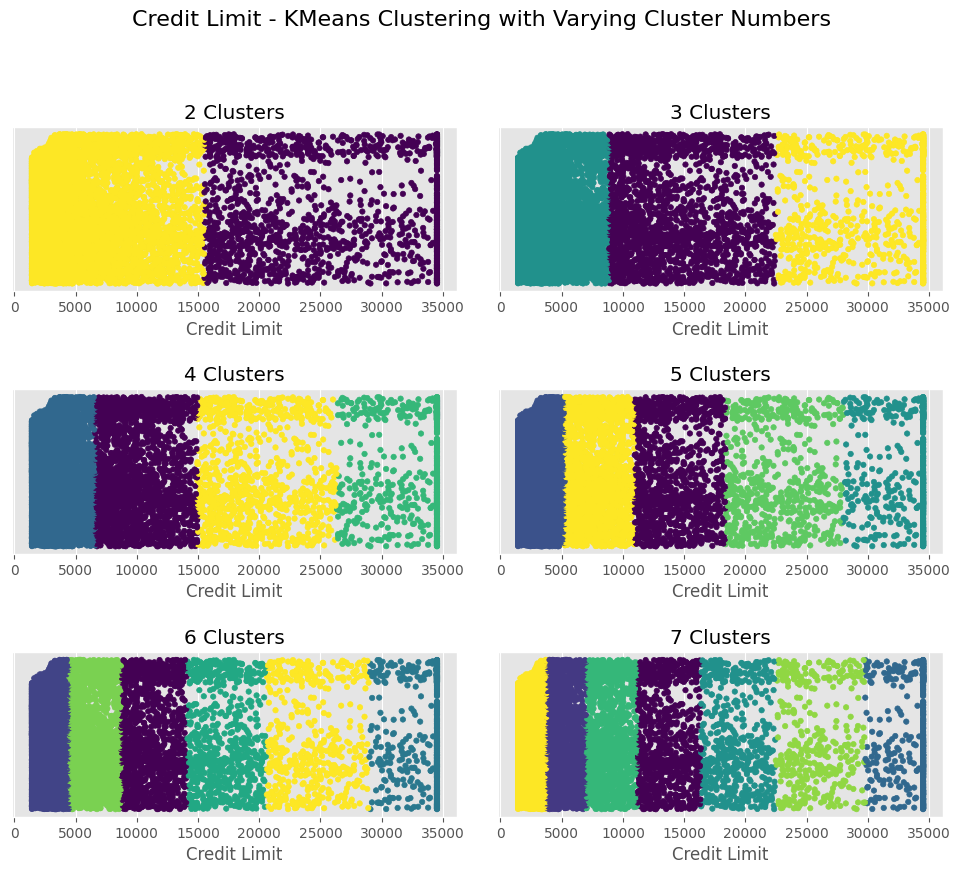

In [ ]:
# use plot_1d_clusters_with_variable_cluster_numbers function to visualize different number of clusters for Credit Limit
plot_1d_clusters_with_variable_cluster_numbers(df[['Credit_Limit']], 'Credit_Limit', 'Credit Limit')


**Suggested Clusters Number** <br>


In [ ]:
# choosing the best cluster number for Credit Limit and create the model
X = df[['Credit_Limit']]
model_CL = KMeans(n_clusters = 7, random_state = 7, n_init = 'auto').fit(X)
model_CL_labels = model_CL.labels_
pd.Series(model_CL_labels).unique()


array([0, 4, 6, 1, 2, 5, 3], dtype=int32)

In [ ]:
# plot the model which we chose the best cluster number for Credit Limit
fig = px.scatter(x = X['Credit_Limit'], y = X.index, color = model_CL_labels)
fig.update_yaxes(showticklabels = False, tickmode = 'linear')
fig.update_layout(
    title = 'Credit Limit Clustering',
    xaxis_title ='Credit Limit',
    yaxis_title = '',
    width = 800,
    height = 400
    )
fig.show()




---



### Total Transaction Amount

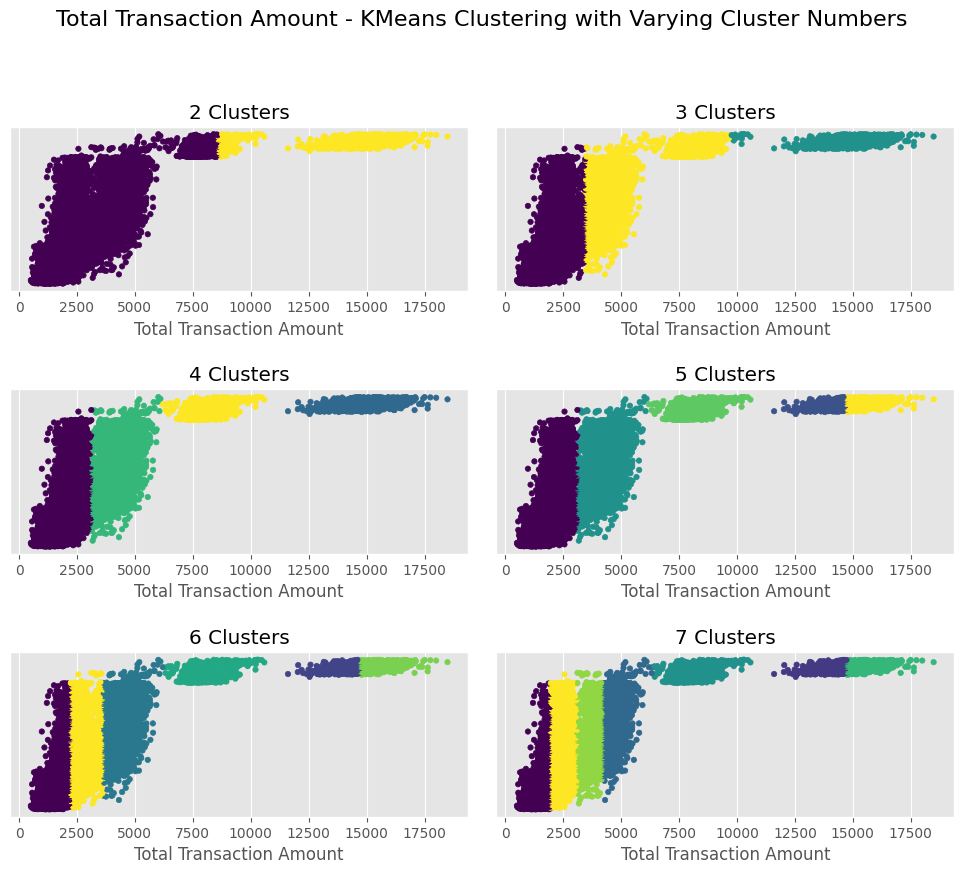

In [ ]:
# use plot_1d_clusters_with_variable_cluster_numbers function to visualize different number of clusters for Total Transaction Amount
plot_1d_clusters_with_variable_cluster_numbers(df[['Total_Trans_Amt']], 'Total_Trans_Amt', 'Total Transaction Amount')


**Suggested Clusters Number** <br>


In [ ]:
# choosing the best cluster number for Total Transaction Amount and create the model
X = df[['Total_Trans_Amt']]
model_TTA = KMeans(n_clusters = 7, random_state = 7, n_init = 'auto').fit(X)
model_TTA_labels = model_TTA.labels_
pd.Series(model_TTA_labels).unique()


array([0, 6, 5, 2, 3, 1, 4], dtype=int32)

In [ ]:
# plot the model which we chose the best cluster number for Total Transaction Amount
fig = px.scatter(x = X['Total_Trans_Amt'], y = X.index, color = model_TTA_labels)
fig.update_yaxes(showticklabels = False, tickmode = 'linear')
fig.update_layout(
    title = 'Total Transaction Amount Clustering',
    xaxis_title ='Total Transaction Amount',
    yaxis_title = '',
    width = 800,
    height = 400
    )
fig.show()




---



### Average Utilization Ratio

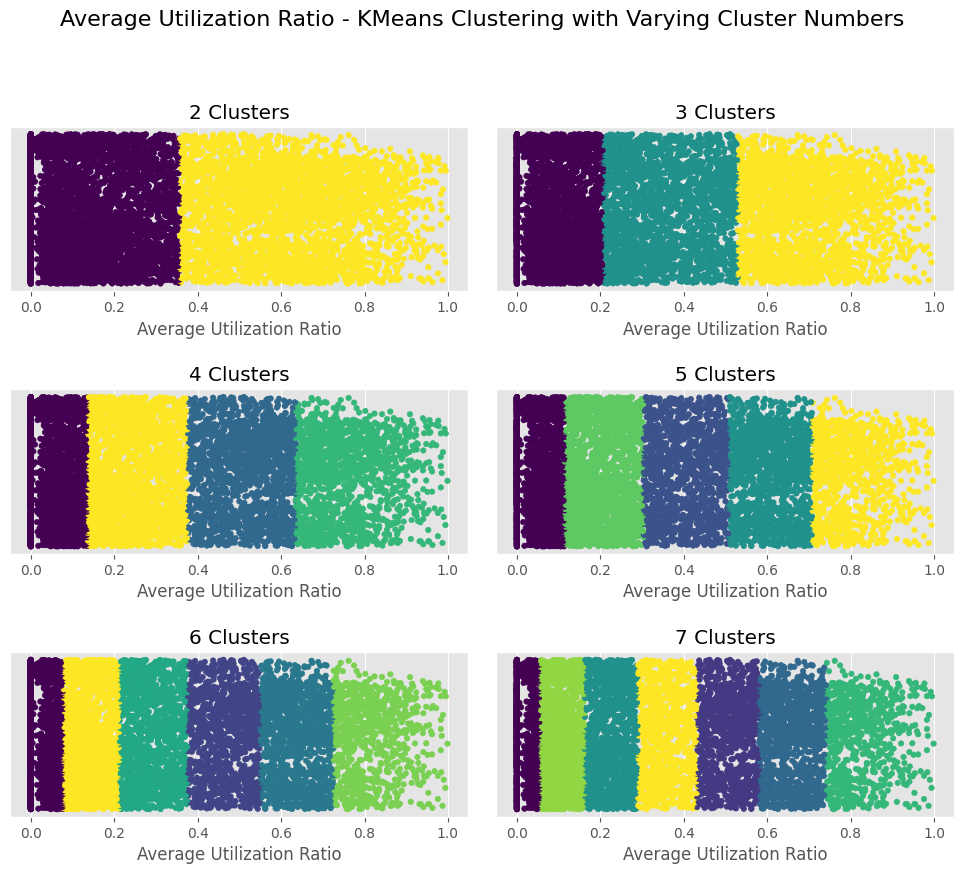

In [ ]:
# use plot_1d_clusters_with_variable_cluster_numbers function to visualize different number of clusters for Utalization Ratio
plot_1d_clusters_with_variable_cluster_numbers(df[['Avg_Utilization_Ratio']], 'Avg_Utilization_Ratio', 'Average Utilization Ratio')


**Suggested Clusters** <br>


In [ ]:
# choosing the best cluster number for Utalization Ratio and create the model
X = df[['Avg_Utilization_Ratio']]
model_AUR = KMeans(n_clusters = 5, random_state = 7, n_init = 'auto').fit(X)
model_AUR_labels = model_AUR.labels_
pd.Series(model_AUR_labels).unique()


array([0, 4, 1, 3, 2], dtype=int32)

In [ ]:
# plot the model which we chose the best cluster number for Utalization Ratio
fig = px.scatter(x = X['Avg_Utilization_Ratio'], y = X.index, color = model_AUR_labels)
fig.update_yaxes(showticklabels = False, tickmode = 'linear')
fig.update_layout(
    title = 'Average Utilization Ratio Clustering',
    xaxis_title ='Average Utilization Ratio',
    yaxis_title = '',
    width = 800,
    height = 400
    )
fig.show()




---



## 2-D Clustering

### Credit Limit and Total Transaction Amount

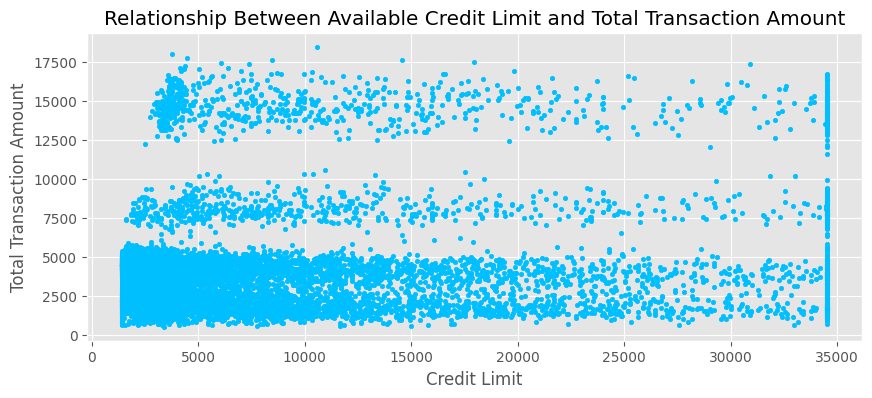

In [ ]:
plt.figure(figsize = (10, 4))
plt.scatter(df['Credit_Limit'], df['Total_Trans_Amt'], s = 10, color = 'deepskyblue')
plt.xlabel('Credit Limit')
plt.ylabel('Total Transaction Amount')
plt.title('Relationship Between Available Credit Limit and Total Transaction Amount')
plt.show()




---



#### Credit Limit and Total Transaction Amount (K-Means)

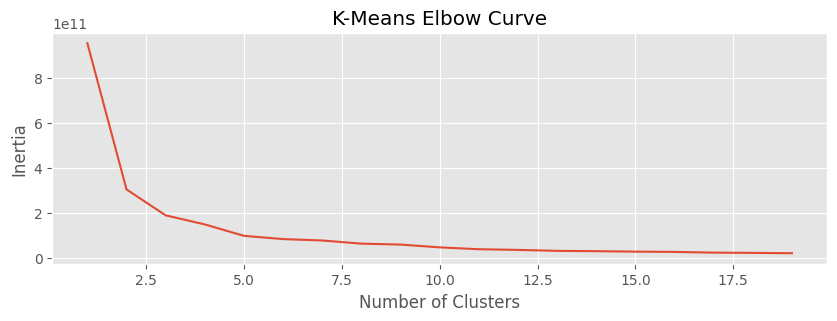

In [ ]:
X = df[['Credit_Limit', 'Total_Trans_Amt']]
kmeans_cluster_elbow(X, 20)


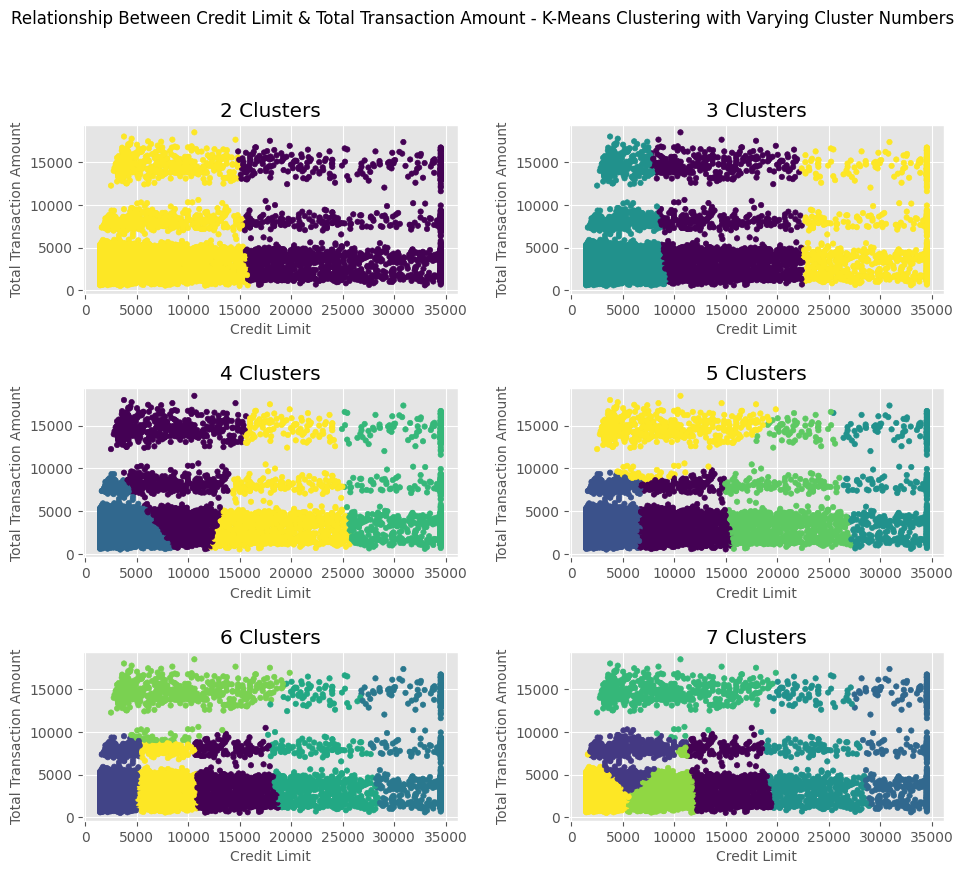

In [ ]:
plot_2d_clusters_with_variable_cluster_numbers(X, 'Credit_Limit', 'Total_Trans_Amt', 'Credit Limit', 'Total Transaction Amount')


**Suggested Clusters Number** <br>


In [ ]:
X = df[['Credit_Limit', 'Total_Trans_Amt']]
model_CT = KMeans(n_clusters = 6, random_state = 7, n_init = 'auto').fit(X)
model_CT_labels = model_CT.labels_
pd.Series(model_CT_labels).unique()


array([0, 5, 1, 2, 3, 4], dtype=int32)

In [ ]:
X = df[['Credit_Limit', 'Total_Trans_Amt']]
fig = px.scatter(x = X['Credit_Limit'], y = X['Total_Trans_Amt'], color = model_CT_labels)
fig.update_layout(
    title = 'Credit Limit and Total Transaction Amount K-Means Clustering',
    xaxis_title ='Credit Limit',
    yaxis_title = 'Total Transaction Amount',
    width = 800,
    height = 400
    )
fig.show()




---



#### Credit Limit and Total Transaction Amount (DBSCAM)

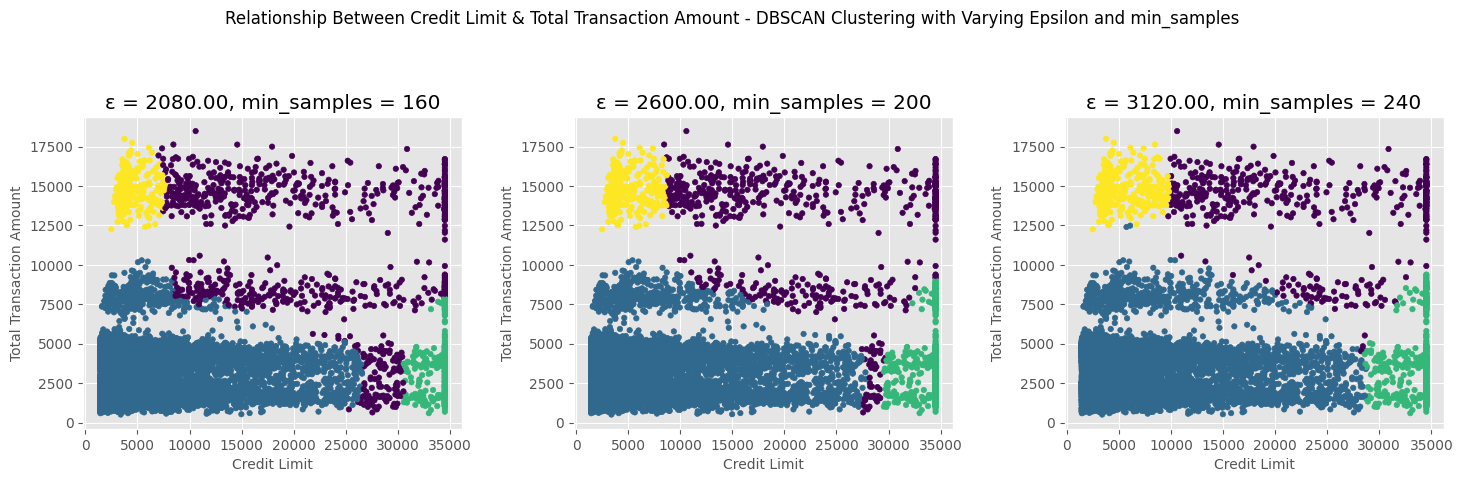

In [ ]:
X = df[['Credit_Limit', 'Total_Trans_Amt']]
plot_2d_clusters_with_variable_eps_min_samples(
    X, 'Credit_Limit', 'Total_Trans_Amt', 'Credit Limit', 'Total Transaction Amount', 2600., 200
    )


**Suggested Clusters Number**

In [ ]:
X = df[['Credit_Limit', 'Total_Trans_Amt']]
model_CT_db = DBSCAN(eps = 3120., min_samples = 240).fit(X)
model_CT_db_labels = pd.Series(model_CT_db.labels_)
print(model_CT_db_labels.value_counts())


 0    8723
 1     574
-1     464
 2     366
Name: count, dtype: int64


In [ ]:
X = df[['Credit_Limit', 'Total_Trans_Amt']]
fig = px.scatter(x = X['Credit_Limit'], y = X['Total_Trans_Amt'], color = model_CT_db_labels)
fig.update_layout(
    title = 'Credit Limit and Total Transaction Amount DBSCAN Clustering',
    xaxis_title ='Credit Limit',
    yaxis_title = 'Total Transaction Amount',
    width = 800,
    height = 400
    )
fig.show()




---



### Credit Limit and Total Revolving Balance

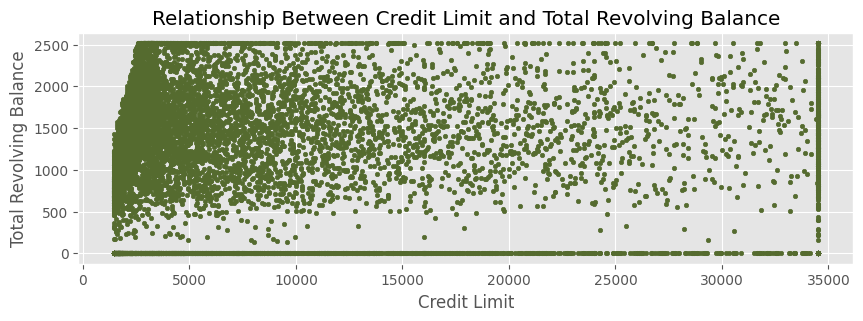

In [ ]:
plt.scatter(df['Credit_Limit'], df['Total_Revolving_Bal'], s = 10, color = 'darkolivegreen')
plt.xlabel('Credit Limit')
plt.ylabel('Total Revolving Balance')
plt.title('Relationship Between Credit Limit and Total Revolving Balance')
plt.show()




---



#### Credit Limit and Total Revolving Balance (K-Means)

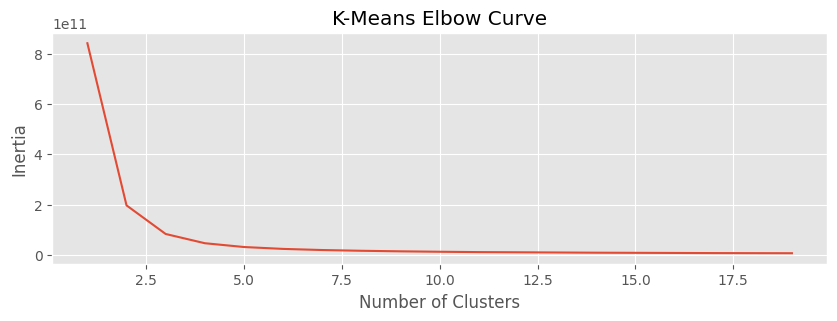

In [ ]:
X = df[['Credit_Limit', 'Total_Revolving_Bal']]
kmeans_cluster_elbow(X, 20)


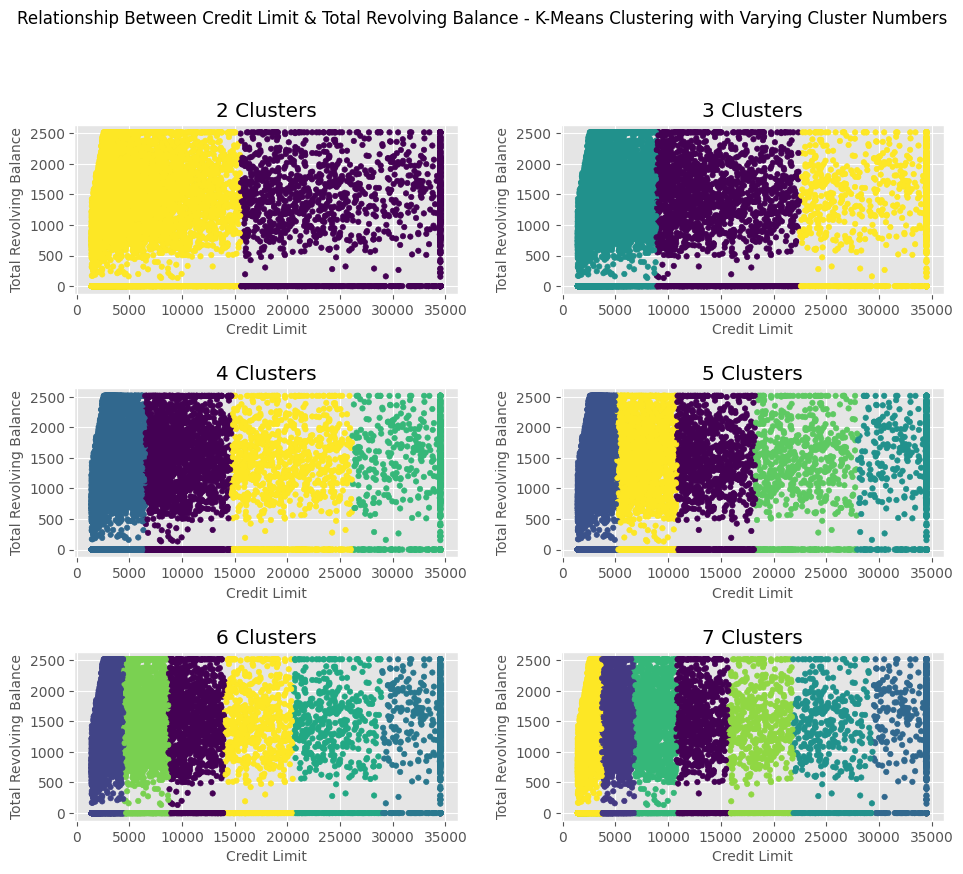

In [ ]:
plot_2d_clusters_with_variable_cluster_numbers(X, 'Credit_Limit', 'Total_Revolving_Bal', 'Credit Limit', 'Total Revolving Balance')


**Suggested Clusters Number** <br>


In [ ]:
X = df[['Credit_Limit', 'Total_Revolving_Bal']]
model_CLRB_kmeans = KMeans(n_clusters = 25, random_state = 7, n_init = 'auto').fit(X)
model_CLRB_kmeans_labels = model_CLRB_kmeans.labels_
pd.Series(model_CLRB_kmeans_labels).unique()


array([ 0,  3,  1, 22, 19, 14,  8, 17,  4, 10, 12, 13,  6, 18,  5,  7, 16,
       23,  2,  9, 15, 20, 11, 21, 24], dtype=int32)

In [ ]:
X = df[['Credit_Limit', 'Total_Revolving_Bal']]
fig = px.scatter(x = X['Credit_Limit'], y = X['Total_Revolving_Bal'], color = model_CLRB_kmeans_labels)
fig.update_layout(
    title = 'Credit Limit and Total Revolving Balance - K-Means Clustering',
    xaxis_title ='Credit Limit',
    yaxis_title = 'Total Revolving Balance',
    width = 800,
    height = 400
    )
fig.show()




---



#### Credit Limit and Total Revolving Balance (DBSCAM)

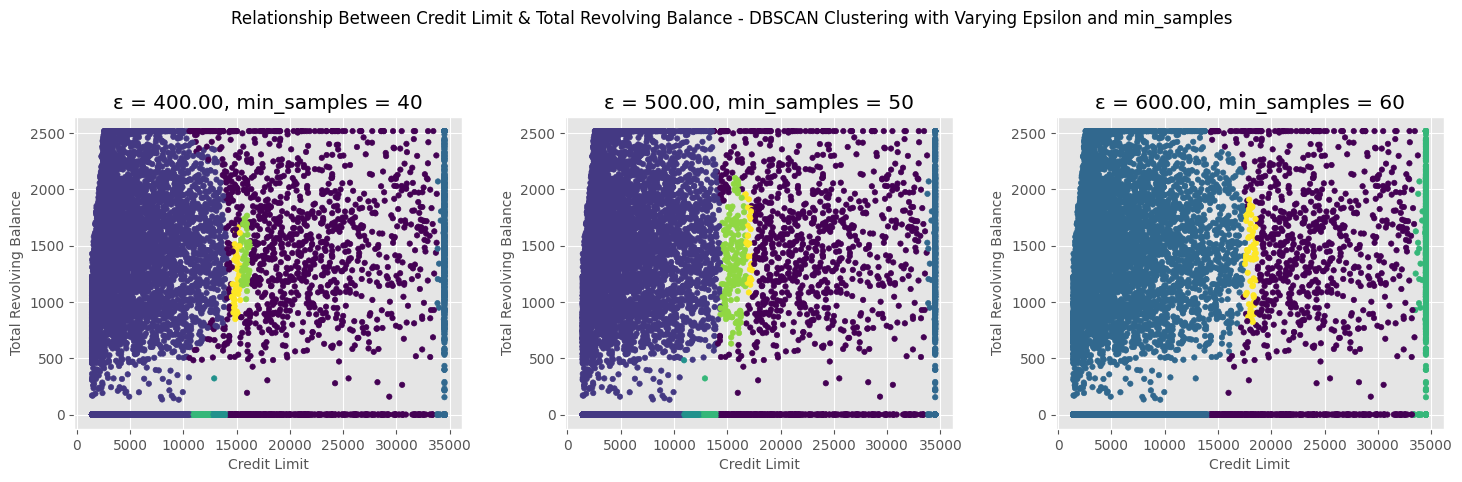

In [ ]:
X = df[['Credit_Limit', 'Total_Revolving_Bal']]
plot_2d_clusters_with_variable_eps_min_samples(
    X, 'Credit_Limit', 'Total_Revolving_Bal', 'Credit Limit', 'Total Revolving Balance', 500., 50
    )


In [ ]:
X = df[['Credit_Limit', 'Total_Revolving_Bal']]
model_CLRB_db = DBSCAN(eps = 500., min_samples = 50).fit(X)
model_CLRB_db_labels = pd.Series(model_CLRB_db.labels_)
print(model_CLRB_db_labels.value_counts())


 0    8032
-1    1197
 1     529
 4     171
 2      90
 3      75
 5      33
Name: count, dtype: int64


In [ ]:
X = df[['Credit_Limit', 'Total_Revolving_Bal']]
fig = px.scatter(x = X['Credit_Limit'], y = X['Total_Revolving_Bal'], color = model_CLRB_db_labels)
fig.update_layout(
    title = 'Credit Limit and Total Revolving Balance - DBSCAN Clustering',
    xaxis_title ='Credit Limit',
    yaxis_title = 'Total Revolving Balance',
    width = 800,
    height = 400
    )
fig.show()




---



### Age and Total Transaction Amount

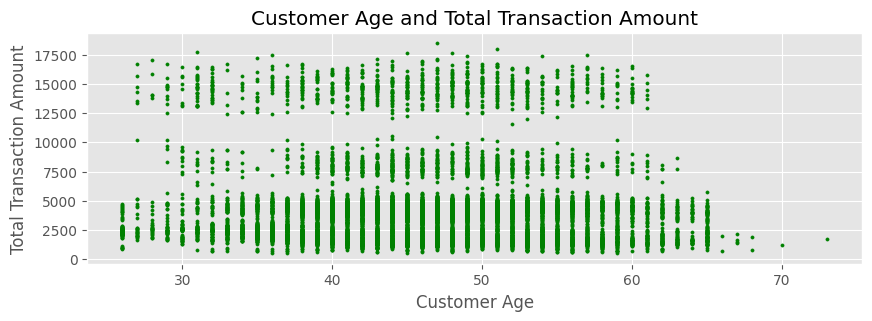

In [ ]:
plt.scatter(df['Customer_Age'], df['Total_Trans_Amt'], s = 5, color = 'green')
plt.xlabel('Customer Age')
plt.ylabel('Total Transaction Amount')
plt.title('Customer Age and Total Transaction Amount')
plt.show()




---



#### Age and Total Transaction Amount (KMeans)

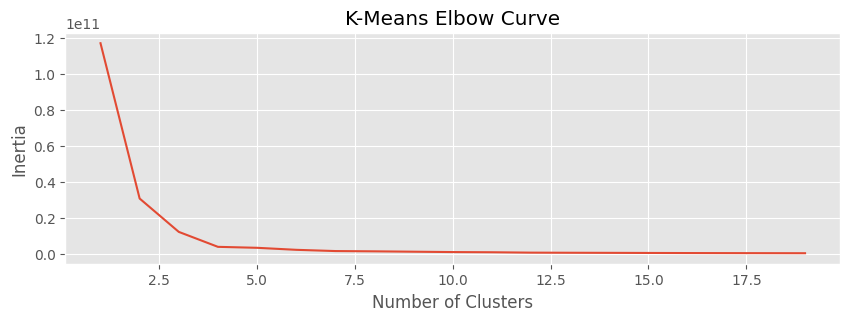

In [ ]:
X = df[['Customer_Age', 'Total_Trans_Amt']]
kmeans_cluster_elbow(X, 20)


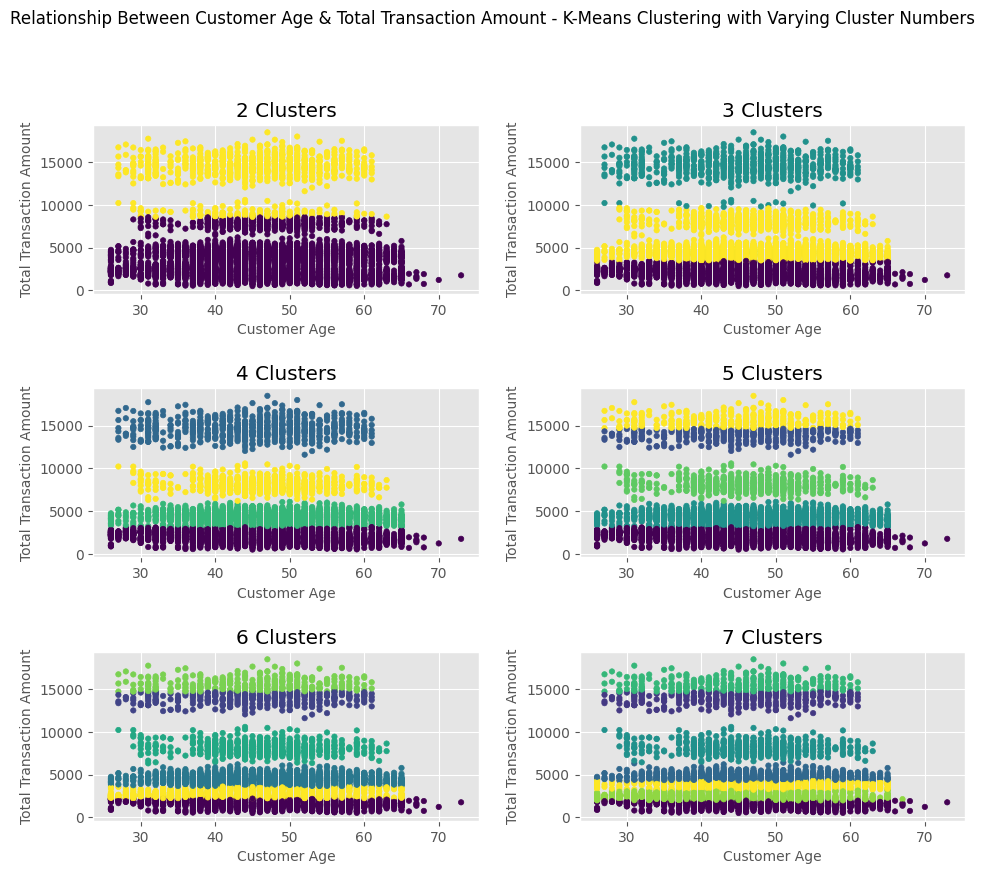

In [ ]:
plot_2d_clusters_with_variable_cluster_numbers(X, 'Customer_Age', 'Total_Trans_Amt', 'Customer Age', 'Total Transaction Amount')


**Suggested Clusters Number**

In [ ]:
X = df[['Customer_Age', 'Total_Trans_Amt']]
model_CATA_kmeans = KMeans(n_clusters = 4, random_state = 7, n_init = 'auto').fit(X)
model_CATA_kmeans_labels = model_CATA_kmeans.labels_
pd.Series(model_CATA_kmeans_labels).unique()


array([0, 2, 3, 1], dtype=int32)

In [ ]:
X = df[['Customer_Age', 'Total_Trans_Amt']]
fig = px.scatter(x = X['Customer_Age'], y = X['Total_Trans_Amt'], color = model_CATA_kmeans_labels)
fig.update_layout(
    title = 'Customer Age and Total Transaction Amount K-Means Clustering',
    xaxis_title ='Customer Age',
    yaxis_title = 'Total Transaction Amount',
    width = 800,
    height = 400
    )
fig.show()




---



#### Age and Total Transaction Amount (DBSCAN)

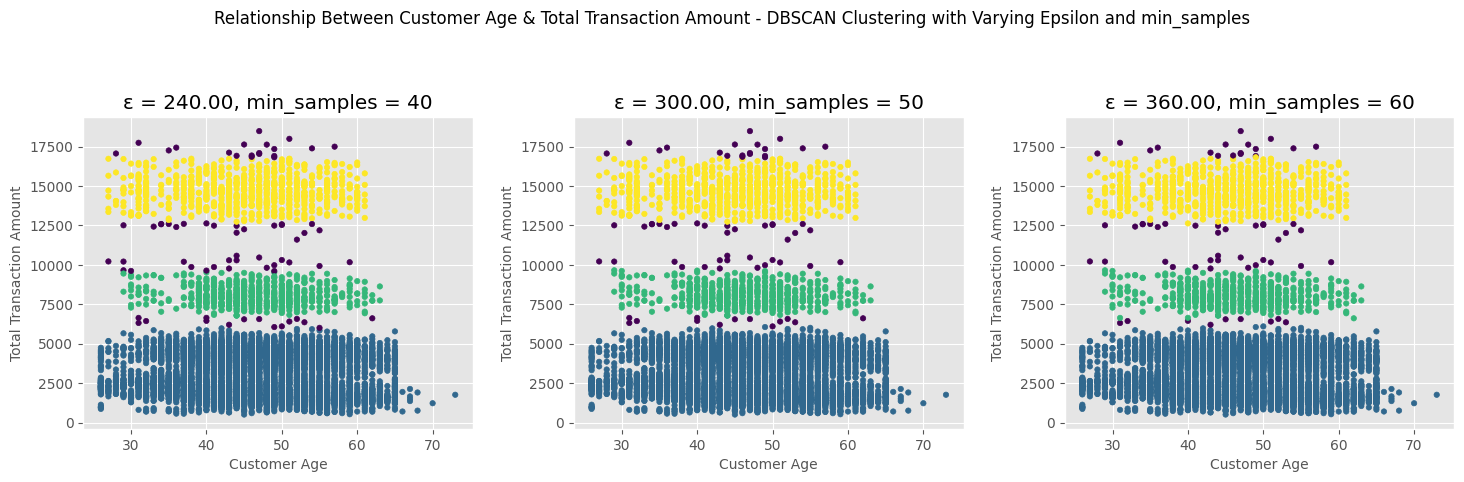

In [ ]:
X = df[['Customer_Age', 'Total_Trans_Amt']]
plot_2d_clusters_with_variable_eps_min_samples(
    X, 'Customer_Age', 'Total_Trans_Amt', 'Customer Age', 'Total Transaction Amount', 300., 50
    )


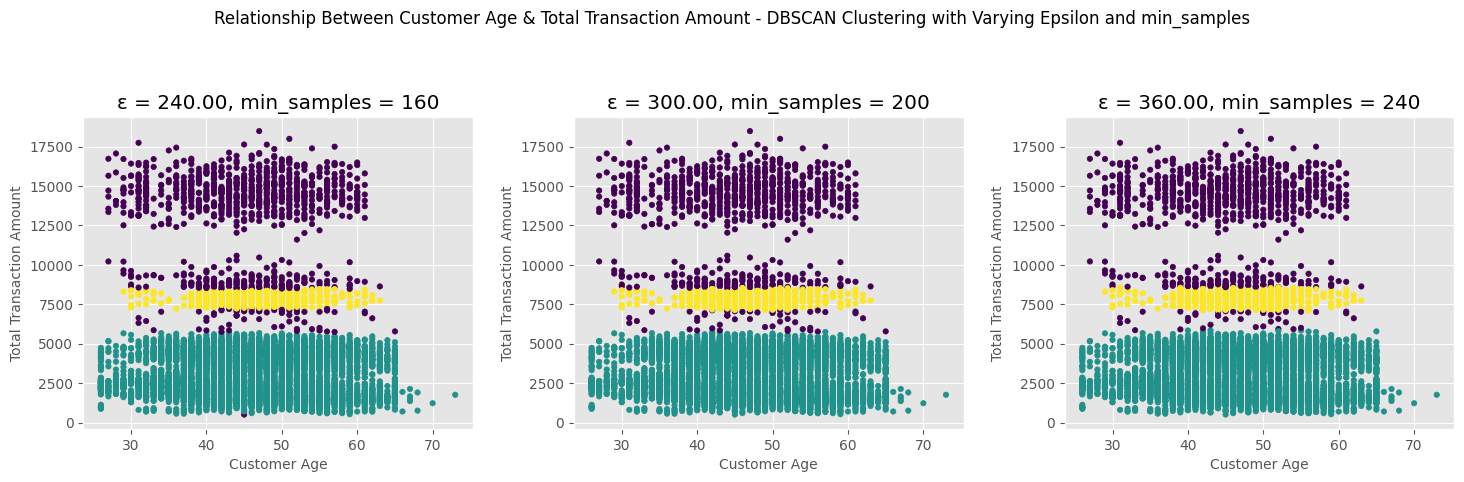

In [ ]:
X = df[['Customer_Age', 'Total_Trans_Amt']]
plot_2d_clusters_with_variable_eps_min_samples(
    X, 'Customer_Age', 'Total_Trans_Amt', 'Customer Age', 'Total Transaction Amount', 300., 200
    )


In [ ]:
X = df[['Customer_Age', 'Total_Trans_Amt']]
model_CATA_db = DBSCAN(eps = 240., min_samples = 40).fit(X)
model_CATA_db_labels = pd.Series(model_CATA_db.labels_)
print(model_CATA_db_labels.value_counts())


 0    8677
 2     709
 1     668
-1      73
Name: count, dtype: int64


In [ ]:
X = df[['Customer_Age', 'Total_Trans_Amt']]
fig = px.scatter(x = X['Customer_Age'], y = X['Total_Trans_Amt'], color = model_CATA_db_labels)
fig.update_layout(
    title = 'Customer Age and Total Transaction Amount DBSCAN Clustering',
    xaxis_title ='Customer Age',
    yaxis_title = 'Total Transaction Amount',
    width = 800,
    height = 400
    )
fig.show()




---



## 3-D Clustering

### Dependent Count & Total Transaction Amount & Average Open To Buy

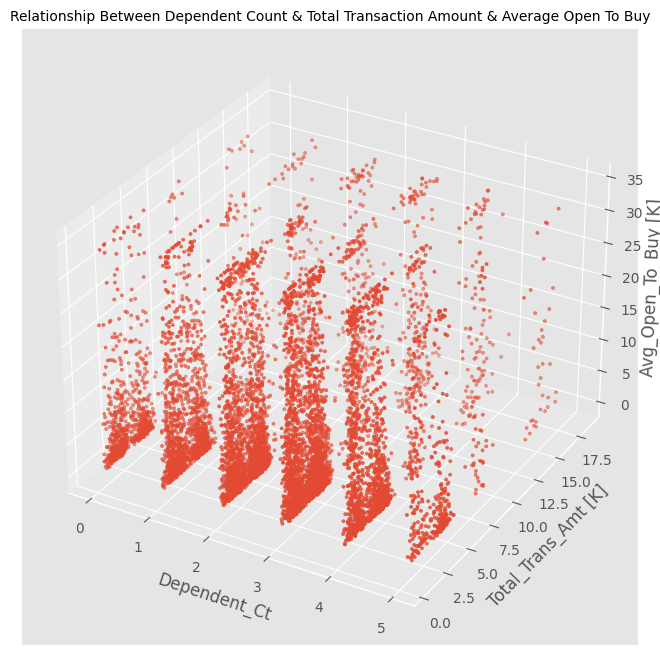

In [ ]:
X = df[['Dependent_Ct', 'Total_Trans_Amt', 'Avg_Open_To_Buy']].copy()
X.loc[:, 'Total_Trans_Amt'] = X['Total_Trans_Amt'] / 1000
X.loc[:, 'Avg_Open_To_Buy'] = X['Avg_Open_To_Buy'] / 1000

plt.figure(figsize = (10, 8))
ax = plt.axes(projection = '3d')

ax.scatter3D(X['Dependent_Ct'], X['Total_Trans_Amt'], X['Avg_Open_To_Buy'], s = 5)

ax.set_xlabel('Dependent_Ct')
ax.set_ylabel('Total_Trans_Amt [K]')
ax.set_zlabel('Avg_Open_To_Buy [K]', labelpad = 0.25)
ax.set_title('Relationship Between Dependent Count & Total Transaction Amount & Average Open To Buy', fontsize = 10)

plt.show()


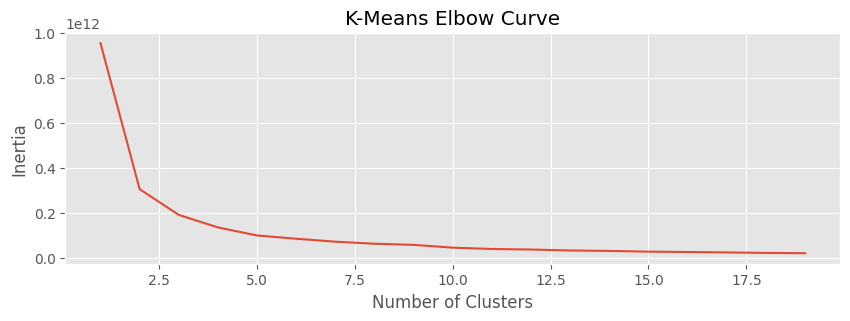

In [ ]:
X = df[['Dependent_Ct', 'Total_Trans_Amt', 'Avg_Open_To_Buy']].copy()
kmeans_cluster_elbow(X, 20)


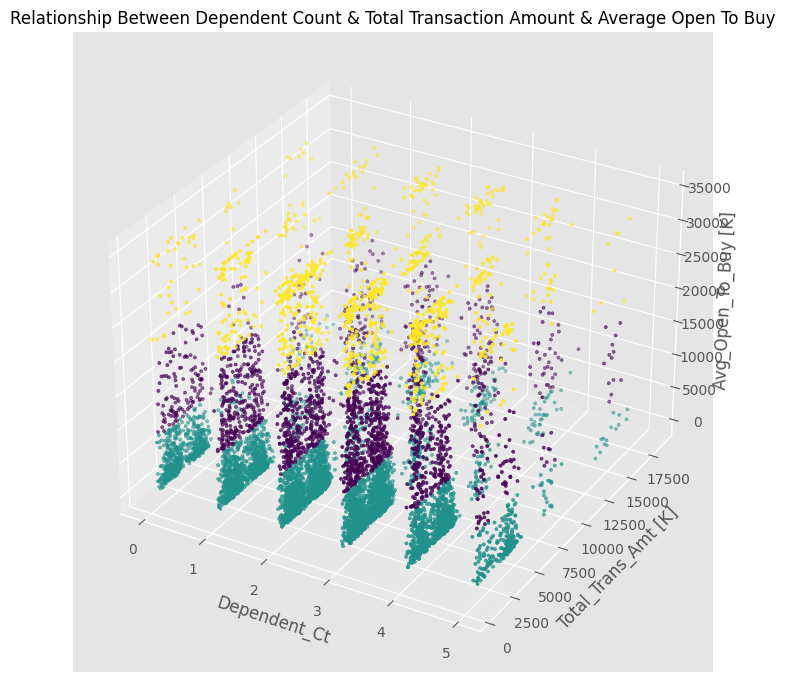

In [ ]:
# fit the kmeans model
model_DTA = KMeans(n_clusters = 3, random_state = 7, n_init = 'auto')
model_DTA = model_DTA.fit(X)

# create a figure with a larger figsize to provide more room for labels
fig = plt.figure(figsize = (10, 8))
ax = fig.add_subplot(111, projection = '3d')

# plot the 3d scatter plot
ax.scatter3D(
    X['Dependent_Ct'],
    X['Total_Trans_Amt'],
    X['Avg_Open_To_Buy'],
    c = model_DTA.labels_,
    cmap = 'viridis',
    s = 5
)

# set axis labels with increased label padding for the z-axis
ax.set_xlabel('Dependent_Ct')
ax.set_ylabel('Total_Trans_Amt [K]')
ax.set_zlabel('Avg_Open_To_Buy [K]', labelpad = 0.25)

# set the plot title
ax.set_title(
    'Relationship Between Dependent Count & Total Transaction Amount & Average Open To Buy', fontsize = 12
    )

# adjust layout to ensure nothing is cut off
plt.subplots_adjust(left = 0.1, right = 0.9, top = 0.9, bottom = 0.1)
plt.show()




---



### Total Revolving Balance &	Average Open To Buy & Total Amount Change (Q4_Q1)

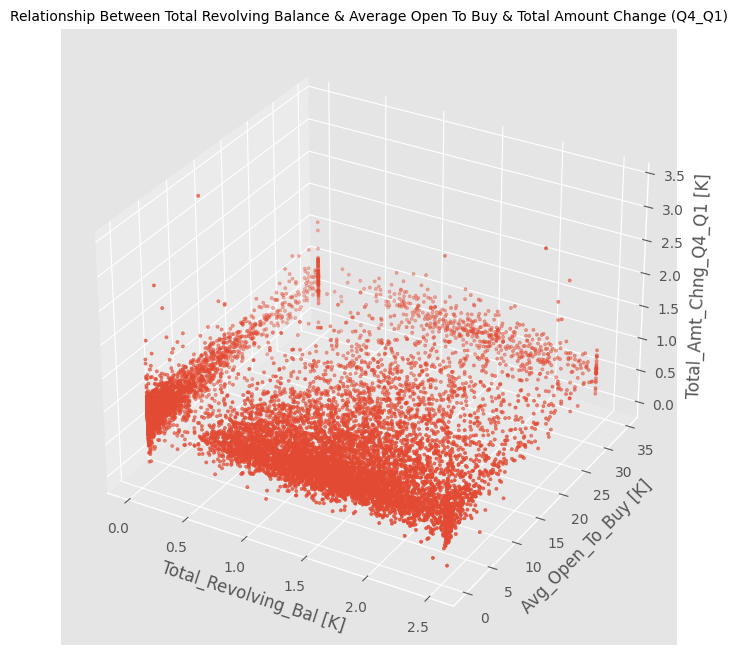

In [ ]:
X = df[['Total_Revolving_Bal', 'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1']].copy()
X.loc[:, 'Total_Revolving_Bal'] = X['Total_Revolving_Bal'] / 1000
X.loc[:, 'Avg_Open_To_Buy'] = X['Avg_Open_To_Buy'] / 1000

plt.figure(figsize = (10, 8))
ax = plt.axes(projection = '3d')

ax.scatter3D(X['Total_Revolving_Bal'], X['Avg_Open_To_Buy'], X['Total_Amt_Chng_Q4_Q1'], s = 5)

ax.set_xlabel('Total_Revolving_Bal [K]')
ax.set_ylabel('Avg_Open_To_Buy [K]')
ax.set_zlabel('Total_Amt_Chng_Q4_Q1 [K]')
ax.set_title('Relationship Between Total Revolving Balance & Average Open To Buy & Total Amount Change (Q4_Q1)', fontsize = 10)

plt.show()


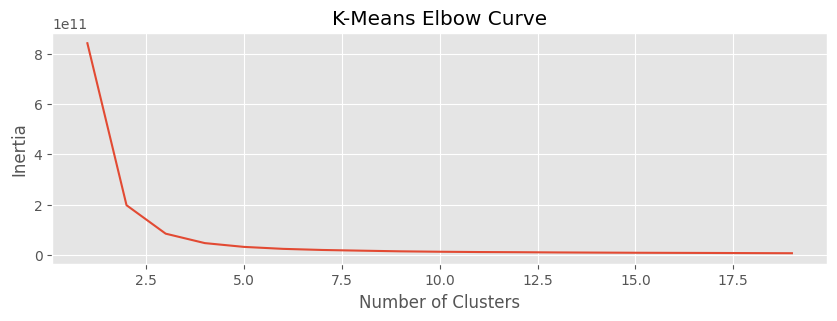

In [ ]:
X = df[['Total_Revolving_Bal', 'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1']].copy()
kmeans_cluster_elbow(X, 20)


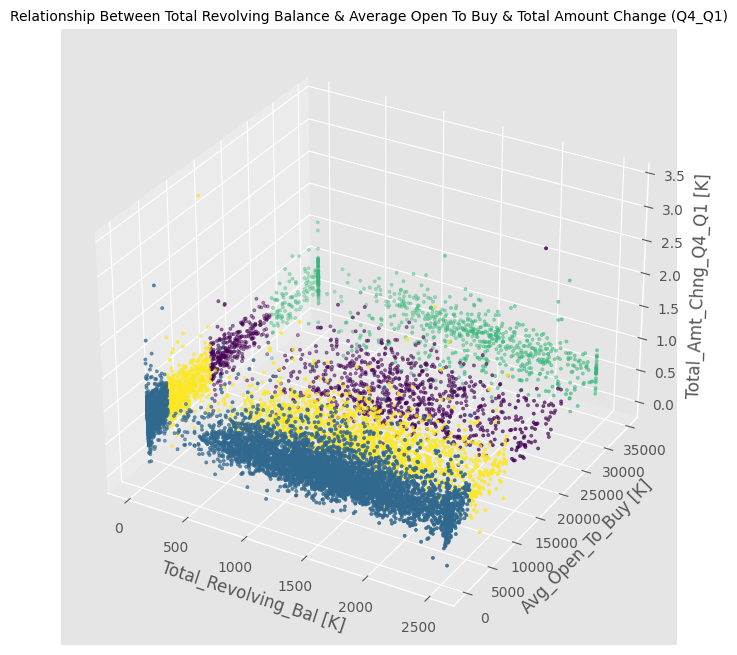

In [ ]:
model_TTA = KMeans(n_clusters = 4, random_state = 7, n_init = 'auto')
model_TTA = model_TTA.fit(X)

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection = '3d')

ax.scatter3D(
    X['Total_Revolving_Bal'],
    X['Avg_Open_To_Buy'],
    X['Total_Amt_Chng_Q4_Q1'],
    c = model_TTA.labels_,
    cmap = 'viridis',
    s = 5
    )

ax.set_xlabel('Total_Revolving_Bal [K]')
ax.set_ylabel('Avg_Open_To_Buy [K]')
ax.set_zlabel('Total_Amt_Chng_Q4_Q1 [K]')
ax.set_title('Relationship Between Total Revolving Balance & Average Open To Buy & Total Amount Change (Q4_Q1)', fontsize = 10)

plt.show()




---



## Higher Dimensional Spaces Clustering

In [ ]:
df_high_dim_space = df.copy()

for col in df_high_dim_space.columns:
  if df_high_dim_space[col].dtype == 'object':
    df_high_dim_space[col] = df_high_dim_space[col].astype('category').cat.codes

df_high_dim_space.head()


Client_Num  Attrition_Flag  Customer_Age  Gender  Dependent_Ct  \
0   768805383               1            45       1             3   
1   818770008               1            49       0             5   
2   713982108               1            51       1             3   
3   769911858               1            40       0             4   
4   709106358               1            40       1             3   

   Education_Level  Marital_Status  Income_Category  Card_Category  \
0                3               1                2              0   
1                2               2                4              0   
2                2               1                3              0   
3                3               3                4              0   
4                5               1                2              0   

   Months_On_Book  Total_Relationship_Ct  Months_Inactive_12_Mon  \
0              39                      5                       1   
1              44                      6                       1   
2              36                      4                       1   
3              34                      3                       4   
4              21                      5                       1   

   Contacts_Ct_12_Mon  Credit_Limit  Total_Revolving_Bal  Avg_Open_To_Buy  \
0                   3       12691.0                  777          11914.0   
1                   2        8256.0                  864           7392.0   
2                   0        3418.0                    0           3418.0   
3                   1        3313.0                 2517            796.0   
4                   0        4716.0                    0           4716.0   

   Total_Amt_Chng_Q4_Q1  Total_Trans_Amt  Total_Trans_Ct  Total_Ct_Chng_Q4_Q1  \
0                 1.335             1144              42                1.625   
1                 1.541             1291              33                3.714   
2                 2.594             1887              20                2.333   
3                 1.405             1171              20                2.333   
4                 2.175              816              28                2.500   

   Avg_Utilization_Ratio  
0                  0.061  
1                  0.105  
2                  0.000  
3                  0.760  
4                  0.000



---



### Customer Age & Credit Limit & Average Open To Buy & Total Revolving Balalnce

In [ ]:
model_ACBR = KMeans(n_clusters = 4, random_state = 7, n_init = 'auto')
model_ACBR = model_ACBR.fit(df_high_dim_space[['Customer_Age', 'Credit_Limit', 'Avg_Open_To_Buy', 'Total_Revolving_Bal']])
pd.Series(model_ACBR.labels_).value_counts()


1    6153
0    2100
3    1034
2     840
Name: count, dtype: int64

In [ ]:
df_high_dim_space['model_ACBR'] = model_ACBR.labels_
df_ACBR_0 = df_high_dim_space[df_high_dim_space['model_ACBR'] == 0]
df_ACBR_1 = df_high_dim_space[df_high_dim_space['model_ACBR'] == 1]
df_ACBR_2 = df_high_dim_space[df_high_dim_space['model_ACBR'] == 2]
df_ACBR_3 = df_high_dim_space[df_high_dim_space['model_ACBR'] == 3]


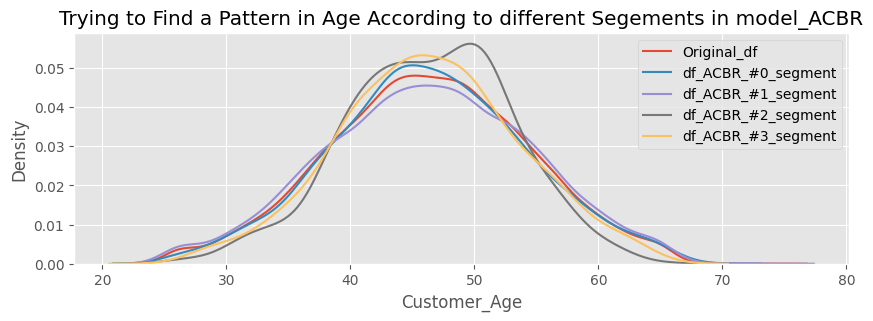

In [ ]:
sns.kdeplot(data = df, x = 'Customer_Age')
sns.kdeplot(data = df_ACBR_0, x = 'Customer_Age')
sns.kdeplot(data = df_ACBR_1, x = 'Customer_Age')
sns.kdeplot(data = df_ACBR_2, x = 'Customer_Age')
sns.kdeplot(data = df_ACBR_3, x = 'Customer_Age')
plt.legend(
    ['Original_df', 'df_ACBR_#0_segment', 'df_ACBR_#1_segment', 'df_ACBR_#2_segment', 'df_ACBR_#3_segment']
    )
plt.title('Trying to Find a Pattern in Age According to different Segements in model_ACBR')
plt.show()




---



### Customer Age & Dependent Count & Total Transaction Amount & Total Revolving Balalnce

In [ ]:
model_ADTR = KMeans(n_clusters = 5, random_state = 7, n_init = 'auto')
model_ADTR = model_ADTR.fit(df_high_dim_space[['Customer_Age', 'Dependent_Ct', 'Total_Trans_Amt', 'Total_Revolving_Bal']])
pd.Series(model_ADTR.labels_).value_counts()


0    3885
2    2989
4    1809
3     747
1     697
Name: count, dtype: int64

In [ ]:
df_high_dim_space['model_ADTR'] = model_ADTR.labels_
df_ADTR_0 = df_high_dim_space[df_high_dim_space['model_ADTR'] == 0]
df_ADTR_1 = df_high_dim_space[df_high_dim_space['model_ADTR'] == 1]
df_ADTR_2 = df_high_dim_space[df_high_dim_space['model_ADTR'] == 2]
df_ADTR_3 = df_high_dim_space[df_high_dim_space['model_ADTR'] == 3]
df_ADTR_4 = df_high_dim_space[df_high_dim_space['model_ADTR'] == 4]


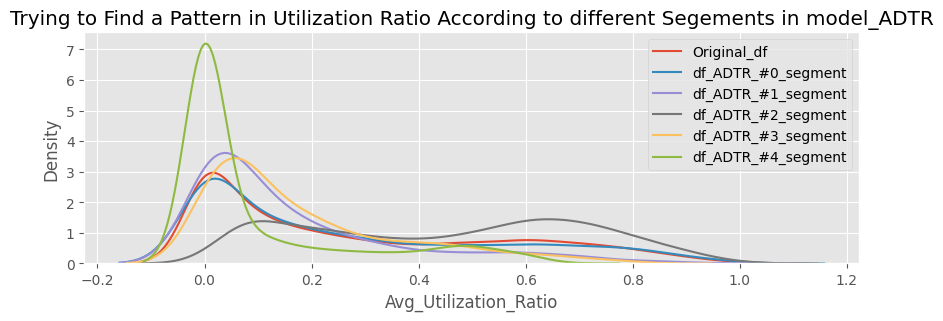

In [ ]:
sns.kdeplot(data = df, x = 'Avg_Utilization_Ratio')
sns.kdeplot(data = df_ADTR_0, x = 'Avg_Utilization_Ratio')
sns.kdeplot(data = df_ADTR_1, x = 'Avg_Utilization_Ratio')
sns.kdeplot(data = df_ADTR_2, x = 'Avg_Utilization_Ratio')
sns.kdeplot(data = df_ADTR_3, x = 'Avg_Utilization_Ratio')
sns.kdeplot(data = df_ADTR_4, x = 'Avg_Utilization_Ratio')
plt.legend(
    ['Original_df', 'df_ADTR_#0_segment', 'df_ADTR_#1_segment', 'df_ADTR_#2_segment', 'df_ADTR_#3_segment', 'df_ADTR_#4_segment']
    )
plt.title('Trying to Find a Pattern in Utilization Ratio According to different Segements in model_ADTR')
plt.show()


✨✨✨✨✨✨✨✨✨✨✨✨✨✨✨✨✨✨✨✨✨✨✨✨✨✨✨✨✨✨✨✨✨✨✨✨✨✨✨✨✨✨✨✨✨✨

# Supervised Learning Model (Churn Classification)

In [ ]:
df.head()


Client_Num     Attrition_Flag  Customer_Age Gender  Dependent_Ct  \
0   768805383  Existing Customer            45      M             3   
1   818770008  Existing Customer            49      F             5   
2   713982108  Existing Customer            51      M             3   
3   769911858  Existing Customer            40      F             4   
4   709106358  Existing Customer            40      M             3   

  Education_Level Marital_Status Income_Category Card_Category  \
0     High School        Married     $60K - $80K          Blue   
1        Graduate         Single  Less than $40K          Blue   
2        Graduate        Married    $80K - $120K          Blue   
3     High School        Unknown  Less than $40K          Blue   
4      Uneducated        Married     $60K - $80K          Blue   

   Months_On_Book  Total_Relationship_Ct  Months_Inactive_12_Mon  \
0              39                      5                       1   
1              44                      6                       1   
2              36                      4                       1   
3              34                      3                       4   
4              21                      5                       1   

   Contacts_Ct_12_Mon  Credit_Limit  Total_Revolving_Bal  Avg_Open_To_Buy  \
0                   3       12691.0                  777          11914.0   
1                   2        8256.0                  864           7392.0   
2                   0        3418.0                    0           3418.0   
3                   1        3313.0                 2517            796.0   
4                   0        4716.0                    0           4716.0   

   Total_Amt_Chng_Q4_Q1  Total_Trans_Amt  Total_Trans_Ct  Total_Ct_Chng_Q4_Q1  \
0                 1.335             1144              42                1.625   
1                 1.541             1291              33                3.714   
2                 2.594             1887              20                2.333   
3                 1.405             1171              20                2.333   
4                 2.175              816              28                2.500   

   Avg_Utilization_Ratio  
0                  0.061  
1                  0.105  
2                  0.000  
3                  0.760  
4                  0.000

In [ ]:
df_churn = df.copy()
df_churn = df_churn.drop(columns = ['Client_Num'])


In [ ]:
print(df_churn.Income_Category.value_counts())


Income_Category
Less than $40K    3561
$40K - $60K       1790
$80K - $120K      1535
$60K - $80K       1402
Unknown           1112
$120K +            727
Name: count, dtype: int64


In [ ]:
df_churn['Income_Category'] = df_churn['Income_Category'].replace({
    'Less than $40K': 40,
    '$40K - $60K': 50,
    '$80K - $120K': 100,
    '$60K - $80K': 70,
    'Unknown': None,
    '$120K +': 120
    })


In [ ]:
df_churn['Income_Category'] = df_churn['Income_Category'].fillna(df_churn['Income_Category'].mean())
print(df_churn['Income_Category'].head())


0     70.0
1     40.0
2    100.0
3     40.0
4     70.0
Name: Income_Category, dtype: float64


In [ ]:
categorical_cols = [
    'Attrition_Flag', 'Customer_Age', 'Gender', 'Dependent_Ct',
    'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category'
    ]
numerical_cols = df_churn.columns.difference(categorical_cols)

scaler = StandardScaler()
df_churn[numerical_cols] = scaler.fit_transform(df_churn[numerical_cols])

for col in categorical_cols:
  df_churn[col] = df_churn[col].astype('category').cat.codes

df_churn.head()


Attrition_Flag  Customer_Age  Gender  Dependent_Ct  Education_Level  \
0               1            19       1             3                3   
1               1            23       0             5                2   
2               1            25       1             3                2   
3               1            14       0             4                3   
4               1            14       1             3                5   

   Marital_Status  Income_Category  Card_Category  Months_On_Book  \
0               1                3              0        0.384621   
1               2                0              0        1.010715   
2               1                4              0        0.008965   
3               3                0              0       -0.241473   
4               1                3              0       -1.869317   

   Total_Relationship_Ct  Months_Inactive_12_Mon  Contacts_Ct_12_Mon  \
0               0.763943               -1.327136            0.492404   
1               1.407306               -1.327136           -0.411616   
2               0.120579               -1.327136           -2.219655   
3              -0.522785                1.641478           -1.315636   
4               0.763943               -1.327136           -2.219655   

   Credit_Limit  Total_Revolving_Bal  Avg_Open_To_Buy  Total_Amt_Chng_Q4_Q1  \
0      0.446622            -0.473422         0.488971              2.623494   
1     -0.041367            -0.366667        -0.008486              3.563293   
2     -0.573698            -1.426858        -0.445658              8.367214   
3     -0.585251             1.661686        -0.734100              2.942843   
4     -0.430877            -1.426858        -0.302868              6.455682   

   Total_Trans_Amt  Total_Trans_Ct  Total_Ct_Chng_Q4_Q1  Avg_Utilization_Ratio  
0        -0.959707       -0.973895             3.834003              -0.775882  
1        -0.916433       -1.357340            12.608573              -0.616276  
2        -0.740982       -1.911206             6.807864              -0.997155  
3        -0.951758       -1.911206             6.807864               1.759686  
4        -1.056263       -1.570365             7.509325              -0.997155

In [ ]:
X = df_churn.drop(columns = ['Attrition_Flag'])
y = df_churn['Attrition_Flag']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 7)




---



## Logistic Regression Model

In [ ]:
clf = LogisticRegression(solver = 'lbfgs', max_iter = 1000)
clf = clf.fit(X_train, y_train)


In [ ]:
clf.score(X_train, y_train), clf.score(X_test, y_test)


(0.9043327984199482, 0.9091806515301086)

In [ ]:
# calculate the confusion matrix
y_train_pred = clf.predict(X_train)
y_test_pred = clf.predict(X_test)

cm_train = confusion_matrix(y_train, y_train_pred)
cm_test = confusion_matrix(y_test, y_test_pred)

cm_train, cm_test


(array([[ 784,  544],
        [ 231, 6542]]),
 array([[ 175,  124],
        [  60, 1667]]))

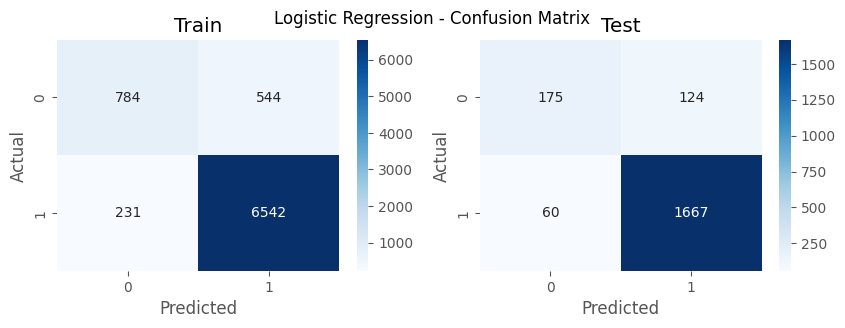

In [ ]:
# visualize confusion matrix
fig, axs = plt.subplots(1, 2, figsize = (10, 3))

sns.heatmap(cm_train, annot = True, cmap = 'Blues', fmt = 'd', ax = axs[0])
axs[0].set_title('Train')
axs[0].set_xlabel('Predicted')
axs[0].set_ylabel('Actual')

sns.heatmap(cm_test, annot = True, cmap = 'Blues', fmt = 'd', ax = axs[1])
axs[1].set_title('Test')
axs[1].set_xlabel('Predicted')
axs[1].set_ylabel('Actual')

plt.suptitle('Logistic Regression - Confusion Matrix')
plt.show()




---



## Decision Tree Model

In [ ]:
clf_dt = DecisionTreeClassifier().fit(X_train, y_train)


In [ ]:
clf_dt.score(X_train, y_train), clf_dt.score(X_test, y_test)


(1.0, 0.9447186574531096)

In [ ]:
# calculate the confusion matrix
y_train_pred = clf_dt.predict(X_train)
y_test_pred = clf_dt.predict(X_test)

cm_train = confusion_matrix(y_train, y_train_pred)
cm_test = confusion_matrix(y_test, y_test_pred)

cm_train, cm_test


(array([[1328,    0],
        [   0, 6773]]),
 array([[ 239,   60],
        [  52, 1675]]))

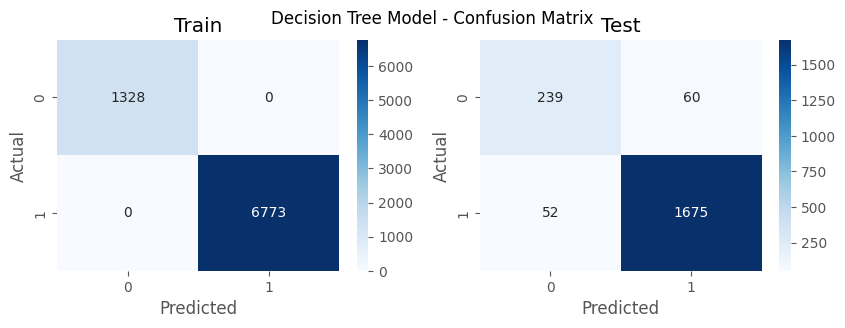

In [ ]:
# visualize confusion matrix
fig, axs = plt.subplots(1, 2, figsize = (10, 3))

sns.heatmap(cm_train, annot = True, cmap = 'Blues', fmt = 'd', ax = axs[0])
axs[0].set_title('Train')
axs[0].set_xlabel('Predicted')
axs[0].set_ylabel('Actual')

sns.heatmap(cm_test, annot = True, cmap = 'Blues', fmt = 'd', ax = axs[1])
axs[1].set_title('Test')
axs[1].set_xlabel('Predicted')
axs[1].set_ylabel('Actual')

plt.suptitle('Decision Tree Model - Confusion Matrix')
plt.show()


---
**End of Project**